#  Load and Explore Dataset

In [1]:
# ==================== COMPLETE MULTI-GPU SETUP ====================
# RUN THIS FIRST AFTER RESTARTING KERNEL
# ==================================================================

import tensorflow as tf
import os

print("🔄 Restarting kernel and setting up multi-GPU...")

# Clean up any existing strategies
if 'strategy' in globals():
    del globals()['strategy']
if 'global_strategy' in globals():
    del globals()['global_strategy']

# Force TensorFlow to use both GPUs
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# Clear any existing TensorFlow sessions
tf.keras.backend.clear_session()

# Configure physical GPUs
gpus = tf.config.list_physical_devices('GPU')

# Create SINGLE strategy instance
if len(gpus) >= 2:
    print(f"✅ Found {len(gpus)} GPUs")
    
    # Enable memory growth
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    
    # Create ONLY ONE strategy instance
    global_strategy = tf.distribute.MirroredStrategy()
    print(f"🎯 Created MirroredStrategy with {global_strategy.num_replicas_in_sync} replicas")
    
else:
    print("⚠️ Using single GPU or CPU")
    global_strategy = tf.distribute.get_strategy()

print("✅ Strategy setup complete! Use 'global_strategy' everywhere.")
print(f"📊 Number of replicas: {global_strategy.num_replicas_in_sync}")

# Show GPU status
print("\n" + "="*50)
!nvidia-smi --query-gpu=index,name,memory.total --format=csv

# Test with a simple operation
print("\n🧪 Testing strategy with simple operation...")
with global_strategy.scope():
    test_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    result = tf.matmul(test_tensor, test_tensor)
    print(f"Test operation successful: {result.numpy()}")

print("🚀 Multi-GPU setup completed successfully!")

2025-09-06 08:39:44.357785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757147984.747710      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757147984.862790      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🔄 Restarting kernel and setting up multi-GPU...
✅ Found 2 GPUs
🎯 Created MirroredStrategy with 2 replicas
✅ Strategy setup complete! Use 'global_strategy' everywhere.
📊 Number of replicas: 2

index, name, memory.total [MiB]
0, Tesla T4, 15360 MiB
1, Tesla T4, 15360 MiB

🧪 Testing strategy with simple operation...


I0000 00:00:1757148004.503589      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757148004.504357      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Test operation successful: [[ 7. 10.]
 [15. 22.]]
🚀 Multi-GPU setup completed successfully!


In [2]:
# ==================== ULTIMATE MULTI-CORE CPU SETUP ====================
# PUT THIS IN THE VERY FIRST CELL OF YOUR NOTEBOOK
# ======================================================================

import os
import multiprocessing as mp
import numpy as np
import pandas as pd
from threadpoolctl import threadpool_limits
import threading

print("🚀 INITIALIZING MULTI-CORE PARALLEL EXECUTION...")

# Get total available CPU cores
TOTAL_CORES = mp.cpu_count()
print(f"✅ Found {TOTAL_CORES} CPU cores")

# Configure environment for maximum parallel performance
os.environ['OMP_NUM_THREADS'] = str(TOTAL_CORES)  # OpenMP threads
os.environ['MKL_NUM_THREADS'] = str(TOTAL_CORES)  # Intel MKL
os.environ['OPENBLAS_NUM_THREADS'] = str(TOTAL_CORES)  # OpenBLAS
os.environ['VECLIB_MAXIMUM_THREADS'] = str(TOTAL_CORES)  # macOS Accelerate
os.environ['NUMEXPR_NUM_THREADS'] = str(TOTAL_CORES)  # NumExpr
os.environ['JOBLIB_NUM_CPUS'] = str(TOTAL_CORES)  # Joblib

print("📊 Environment configured for parallel execution")

# Set thread limits for numerical libraries
try:
    with threadpool_limits(limits=TOTAL_CORES, user_api='blas'):
        with threadpool_limits(limits=TOTAL_CORES, user_api='openmp'):
            print("✅ BLAS and OpenMP threads configured")
except:
    print("ℹ️ threadpoolctl not available, using environment variables only")

# Global parallel context
class ParallelExecutor:
    def __init__(self, n_jobs=-1):
        self.n_jobs = n_jobs if n_jobs != -1 else TOTAL_CORES
        
    def __enter__(self):
        return self
        
    def __exit__(self, *args):
        pass

parallel_executor = ParallelExecutor(n_jobs=-1)

# Initialize parallel libraries
def enable_parallel_pandas():
    """Enable parallel operations for pandas"""
    try:
        import swifter
        print("✅ Swifter enabled for parallel pandas operations")
        return True
    except ImportError:
        print("ℹ️ Install 'swifter' for pandas parallelization: !pip install swifter")
        return False
        
    try:
        from pandarallel import pandarallel
        pandarallel.initialize(nb_workers=TOTAL_CORES, progress_bar=False)
        print("✅ Pandarallel initialized")
    except ImportError:
        pass

enable_parallel_pandas()

print("🎯 All CPU operations configured for parallel execution!")

# Test parallel execution
print("\n🧪 Testing parallel operations...")

# Test with threadpoolctl to verify numpy uses all cores
try:
    with threadpool_limits(limits=TOTAL_CORES):
        large_array = np.random.rand(1000, 1000)
        result = np.dot(large_array, large_array.T)
        print("✅ NumPy parallel operation test completed")
except:
    large_array = np.random.rand(1000, 1000)
    result = np.dot(large_array, large_array.T)
    print("✅ NumPy operation completed (thread limits not available)")

print("\n✅ Setup complete! All subsequent CPU operations will use all cores!")

# Show current CPU status
print("\n" + "="*60)
print("CURRENT CPU STATUS")
print("="*60)
print(f"Total cores: {TOTAL_CORES}")
print(f"Active threads: {threading.active_count()}")

# Performance tips
print("\n" + "="*60)
print("PERFORMANCE TIPS")
print("="*60)
print("📋 For pandas: df.swifter.apply(func) - uses all cores")
print("📋 For sklearn: set n_jobs=-1")
print("📋 For joblib: Parallel(n_jobs=-1)")
print("📋 Most numpy operations auto-parallelize")

# Verify environment
print("\n" + "="*60)
print("ENVIRONMENT CONFIGURATION")
print("="*60)
for var in ['OMP_NUM_THREADS', 'MKL_NUM_THREADS', 'NUMEXPR_NUM_THREADS']:
    print(f"{var}: {os.environ.get(var, 'Not set')}")

print("\n🔥 Ready for maximum CPU performance! All cores will be utilized!")

🚀 INITIALIZING MULTI-CORE PARALLEL EXECUTION...
✅ Found 4 CPU cores
📊 Environment configured for parallel execution
✅ BLAS and OpenMP threads configured
ℹ️ Install 'swifter' for pandas parallelization: !pip install swifter
🎯 All CPU operations configured for parallel execution!

🧪 Testing parallel operations...
✅ NumPy parallel operation test completed

✅ Setup complete! All subsequent CPU operations will use all cores!

CURRENT CPU STATUS
Total cores: 4
Active threads: 7

PERFORMANCE TIPS
📋 For pandas: df.swifter.apply(func) - uses all cores
📋 For sklearn: set n_jobs=-1
📋 For joblib: Parallel(n_jobs=-1)
📋 Most numpy operations auto-parallelize

ENVIRONMENT CONFIGURATION
OMP_NUM_THREADS: 4
MKL_NUM_THREADS: 4
NUMEXPR_NUM_THREADS: 4

🔥 Ready for maximum CPU performance! All cores will be utilized!


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Bidirectional, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import time

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set matplotlib style
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Load your dataset
train_df = pd.read_csv('/kaggle/input/440project/Question Answer Classification Dataset 2 Training.csv')
test_df = pd.read_csv('/kaggle/input/440project/Updated Question Answer Classification DatasetTest.csv')

# Display dataset information
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)
print("\nTraining set columns:", train_df.columns.tolist())
print("\nClass distribution in training set:")
print(train_df['Class'].value_counts())
print("\nClass distribution in testing set:")
print(test_df['Class'].value_counts())

# Display sample data
print("\nSample from training data:")
print(train_df.head(3))

Training set shape: (279999, 2)
Testing set shape: (59999, 2)

Training set columns: ['QA Text', 'Class']

Class distribution in training set:
Class
Education & Reference     28177
Sports                    28127
Business & Finance        28085
Society & Culture         28081
Family & Relationships    28049
Politics & Government     27988
Computers & Internet      27962
Science & Mathematics     27870
Health                    27863
Entertainment & Music     27797
Name: count, dtype: int64

Class distribution in testing set:
Class
Science & Mathematics     6000
Education & Reference     6000
Health                    6000
Computers & Internet      6000
Entertainment & Music     6000
Business & Finance        6000
Society & Culture         6000
Politics & Government     6000
Sports                    6000
Family & Relationships    5999
Name: count, dtype: int64

Sample from training data:
                                             QA Text                  Class
0  Question Title:\nWha

In [5]:
# df_train=train_df
# df_test=test_df
# train_df=df_test.sample(50000,replace=True)
# test_df=df_test.sample(20000)
# print(train_df.shape)
# print(test_df.shape)

# Text Preprocessing Functions

In [5]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [6]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from multiprocessing import Pool, cpu_count
import nltk

# Download stopwords if not already available
nltk.download('stopwords', quiet=True)

# Optimized text preprocessing function
def preprocess_text(text):
    if isinstance(text, float) or text is None:  # Handle NaN values
        return ""
    
    # Step 1: Replace all whitespace variants with single spaces
    text = re.sub(r'\s+', ' ', text)  # This handles \n, \t, \r, \\n, multiple spaces, etc.
    
    # Step 2: Remove special characters but keep letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Step 3: Convert to lowercase
    text = text.lower()
    
    # Step 4: Remove extra whitespace (should be redundant but safe)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Function to process text in parallel
def preprocess_parallel(texts, n_cores=None):
    if n_cores is None:
        n_cores = cpu_count()  # Use all available cores
    
    with Pool(n_cores) as pool:
        results = pool.map(preprocess_text, texts)
    
    return results

# Apply preprocessing to training data using all cores
print("Preprocessing training text data using all CPU cores...")
print(f"Available CPU cores: {cpu_count()}")

# Process in parallel
train_df['processed_text'] = preprocess_parallel(train_df['QA Text'].tolist())
test_df['processed_text'] = preprocess_parallel(test_df['QA Text'].tolist())

print("Preprocessing completed!")

Preprocessing training text data using all CPU cores...
Available CPU cores: 4
Preprocessing completed!


In [8]:
# Test the simplified preprocessing function
test_texts = [
    "Question Title:\nWhat are the names of the 206 bones?\nQuestion Content:\n\nBest Answer:\\n206 bones of the human body:\\n\\nSKULL - AXIAL SKELETON",
    "can you tell me the university name\\nin which i can do distance mphil foods & nutrition?",
    "Suggestions or Advice on tracking someone\nwho owes you money from a small claims verdict and \"skipped town?\""
]

print("Testing simplified preprocessing function:")
print("=" * 60)
for i, text in enumerate(test_texts):
    print(f"Original {i+1}: {repr(text)}")
    processed = preprocess_text(text)
    print(f"Processed {i+1}: {repr(processed)}")
    print("-" * 60)

Testing simplified preprocessing function:
Original 1: 'Question Title:\nWhat are the names of the 206 bones?\nQuestion Content:\n\nBest Answer:\\n206 bones of the human body:\\n\\nSKULL - AXIAL SKELETON'
Processed 1: 'question titl name bone question content best answern bone human bodynnskul axial skeleton'
------------------------------------------------------------
Original 2: 'can you tell me the university name\\nin which i can do distance mphil foods & nutrition?'
Processed 2: 'tell univers namenin distanc mphil food nutrit'
------------------------------------------------------------
Original 3: 'Suggestions or Advice on tracking someone\nwho owes you money from a small claims verdict and "skipped town?"'
Processed 3: 'suggest advic track someon owe money small claim verdict skip town'
------------------------------------------------------------


In [9]:
# Check preprocessing results
print("\nSample of preprocessed text:")
print("Original:", train_df['QA Text'].iloc[0][:100] + "...")
print("Processed:", train_df['processed_text'].iloc[0][:100] + "...")


Sample of preprocessed text:
Original: Question Title:
What are the names of the 206 bones in the human body?
Question Content:

Best Answe...
Processed: question titl name bone human bodi question content best answer bone human bodynnskul axial skeleton...


# Prepare Data for Skip-gram Training

Number of sentences: 279999
Average sentence length: 52.43
Max sentence length: 810
Min sentence length: 6


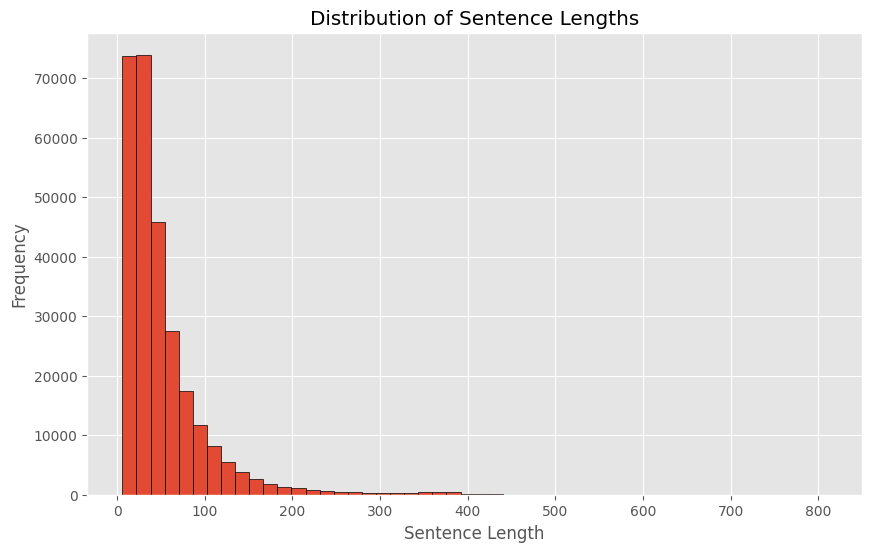

In [8]:
# Prepare sentences for Word2Vec training
sentences = [text.split() for text in train_df['processed_text'] if text.strip() != '']

# Check sentence statistics
sentence_lengths = [len(sentence) for sentence in sentences]
print(f"Number of sentences: {len(sentences)}")
print(f"Average sentence length: {np.mean(sentence_lengths):.2f}")
print(f"Max sentence length: {max(sentence_lengths)}")
print(f"Min sentence length: {min(sentence_lengths)}")

# Plot sentence length distribution
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# Train Skip-gram Embeddings (Adjusted)

## v7: multiprocessing

In [9]:
import multiprocessing
from gensim.models import Word2Vec
import time

print("⚡ Ultra-optimized Word2Vec for 280K rows...")

# Use ALL available CPU cores
cores = multiprocessing.cpu_count()
print(f"Using {cores} CPU cores")

start_time = time.time()

# Initialize the model
model = Word2Vec(
    vector_size=100,      # Smaller = faster
    window=5,             # Smaller window
    min_count=2,
    sg=1,                 # Skip-gram
    workers=cores,        # Use ALL cores
    epochs=3,             # Fewer epochs
    batch_words=100000,   # Larger batches
    alpha=0.025,
    negative=5,           # Fewer negative samples
    sample=1e-4,          # More aggressive subsampling
)

# Build vocabulary FIRST (this is fast)
print("📚 Building vocabulary...")
vocab_start = time.time()
model.build_vocab(sentences)
vocab_time = time.time() - vocab_start
print(f"Vocabulary built in {vocab_time:.2f}s - {len(model.wv.key_to_index):,} words")

# NOW train the model (this is the actual training)
print("🚀 Training Skip-gram model...")
train_start = time.time()
model.train(
    sentences, 
    total_examples=model.corpus_count,
    epochs=model.epochs,
    compute_loss=True  # Track training progress
)
training_time = time.time() - train_start

total_time = time.time() - start_time
print(f"✅ Training completed in {training_time:.2f}s")
print(f"📊 Total time (vocab + training): {total_time:.2f}s")
print(f"⚡ Speed: {len(sentences)*3/training_time:.0f} sentences/second")

# Check the model actually learned something
print(f"\n🎯 Model trained successfully!")
print(f"Vocabulary size: {len(model.wv.key_to_index):,}")
print(f"Final loss: {model.get_latest_training_loss():.2f}")

# Test with sample words
test_words = ['scienc', 'educ', 'polit', 'question', 'answer']
print("\n🔍 Testing embeddings:")
for word in test_words:
    if word in model.wv:
        similar = model.wv.most_similar(word, topn=2)
        print(f"'{word}': {[w[0] for w in similar]}")
    else:
        print(f"'{word}' not in vocabulary")

⚡ Ultra-optimized Word2Vec for 280K rows...
Using 4 CPU cores
📚 Building vocabulary...
Vocabulary built in 5.05s - 148,109 words
🚀 Training Skip-gram model...
✅ Training completed in 15.59s
📊 Total time (vocab + training): 20.64s
⚡ Speed: 53882 sentences/second

🎯 Model trained successfully!
Vocabulary size: 148,109
Final loss: 13665334.00

🔍 Testing embeddings:
'scienc': ['studi', 'biolog']
'educ': ['phd', 'curriculum']
'polit': ['democraci', 'liber']
'question': ['what', 'answer']
'answer': ['ye', 'what']


# Tokenization and Sequence Preparation (Adjusted)

In [12]:
test_df.columns

Index(['QA Text', 'Class', 'processed_text'], dtype='object')

In [10]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['processed_text'])
vocab_size = len(tokenizer.word_index) + 1
print(f"Tokenizer vocabulary size: {vocab_size}")

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df['processed_text'])
X_test = tokenizer.texts_to_sequences(test_df['processed_text'])

# Analyze sequence lengths
train_lengths = [len(seq) for seq in X_train]
test_lengths = [len(seq) for seq in X_test]

print(f"Average training sequence length: {np.mean(train_lengths):.2f}")
print(f"Max training sequence length: {max(train_lengths)}")
print(f"95th percentile: {np.percentile(train_lengths, 95):.2f}")
print(f"99th percentile: {np.percentile(train_lengths, 99):.2f}")

# Determine optimal max sequence length (using 95th percentile)
max_len = int(np.percentile(train_lengths, 95))
print(f"Using sequence length: {max_len} (95th percentile)")

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

print(f"Training sequences shape: {X_train.shape}")
print(f"Testing sequences shape: {X_test.shape}")

# Check how much data we're truncating
long_sequences = sum(1 for length in train_lengths if length > max_len)
print(f"Percentage of sequences longer than {max_len}: {(long_sequences/len(train_lengths))*100:.2f}%")

Tokenizer vocabulary size: 606419
Average training sequence length: 52.43
Max training sequence length: 810
95th percentile: 143.00
99th percentile: 291.00
Using sequence length: 143 (95th percentile)
Training sequences shape: (279999, 143)
Testing sequences shape: (59999, 143)
Percentage of sequences longer than 143: 4.94%


# Create Embedding Matrix (Adjusted)

In [11]:
# Create embedding matrix with the larger embedding dimension
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
found_words = 0
not_found_words = 0
low_freq_words = 0
min_count = 2  # Define min_count since it was used in your Word2Vec setup

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    
    # Check if word is in our trained embeddings - use 'model' instead of 'skipgram_model'
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]
        found_words += 1
    else:
        # Check if this is a low frequency word that was filtered out
        word_freq = tokenizer.word_counts[word]
        if word_freq < min_count:
            low_freq_words += 1
        else:
            not_found_words += 1
        
        # Initialize with random values for unknown words
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print(f"Words found in Word2Vec vocabulary: {found_words:,}")
print(f"Words not found (but should be): {not_found_words:,}")
print(f"Low frequency words filtered out (<{min_count} occurrences): {low_freq_words:,}")
print(f"Coverage of meaningful words: {(found_words/(found_words + not_found_words))*100:.2f}%")

# Prepare labels
label_map = {label: idx for idx, label in enumerate(train_df['Class'].unique())}
reverse_label_map = {idx: label for label, idx in label_map.items()}

y_train = train_df['Class'].map(label_map).values
y_test = test_df['Class'].map(label_map).values
num_classes = len(label_map)

print(f"\nNumber of classes: {num_classes}")
print("Label mapping:", label_map)

# Check class distribution
print("\nClass distribution in training set:")
for label, idx in label_map.items():
    count = sum(y_train == idx)
    print(f"  {label}: {count} samples ({count/len(y_train)*100:.2f}%)")

Words found in Word2Vec vocabulary: 148,109
Words not found (but should be): 0
Low frequency words filtered out (<2 occurrences): 458,309
Coverage of meaningful words: 100.00%

Number of classes: 10
Label mapping: {'Science & Mathematics': 0, 'Education & Reference': 1, 'Politics & Government': 2, 'Entertainment & Music': 3, 'Sports': 4, 'Society & Culture': 5, 'Computers & Internet': 6, 'Family & Relationships': 7, 'Business & Finance': 8, 'Health': 9}

Class distribution in training set:
  Science & Mathematics: 27870 samples (9.95%)
  Education & Reference: 28177 samples (10.06%)
  Politics & Government: 27988 samples (10.00%)
  Entertainment & Music: 27797 samples (9.93%)
  Sports: 28127 samples (10.05%)
  Society & Culture: 28081 samples (10.03%)
  Computers & Internet: 27962 samples (9.99%)
  Family & Relationships: 28049 samples (10.02%)
  Business & Finance: 28085 samples (10.03%)
  Health: 27863 samples (9.95%)


# Model Creation Functions (Adjusted for Larger Sequences)

In [15]:
# # Model creation functions optimized for longer sequences
# # def create_dnn_model():
# #     model = Sequential([
# #         Embedding(vocab_size, embedding_dim, 
# #                  weights=[embedding_matrix], 
# #                  input_length=max_len, 
# #                  trainable=False),
# #         tf.keras.layers.GlobalAveragePooling1D(),  # Better than Flatten for long sequences
# #         Dense(256, activation='relu'),
# #         Dropout(0.6),
# #         Dense(128, activation='relu'),
# #         Dropout(0.5),
# #         Dense(64, activation='relu'),
# #         Dropout(0.4),
# #         Dense(num_classes, activation='softmax')
# #     ])
    
# #     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
# #                   loss='sparse_categorical_crossentropy', 
# #                   metrics=['accuracy'])
# #     return model
# def create_improved_dnn_model():
#     model = Sequential([
#         Embedding(vocab_size, embedding_dim, 
#                  weights=[embedding_matrix], 
#                  input_length=max_len, 
#                  trainable=True),  # Make trainable for fine-tuning
        
#         Conv1D(128, 5, activation='relu'),  # Add convolutional layer
#         GlobalMaxPooling1D(),
        
#         Dense(512, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
        
#         Dense(256, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.4),
        
#         Dense(128, activation='relu'),
#         Dropout(0.3),
        
#         Dense(num_classes, activation='softmax')
#     ])
    
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower LR
#                   loss='sparse_categorical_crossentropy', 
#                   metrics=['accuracy'])
#     return model

# def create_rnn_model(bidirectional=False):
#     model = Sequential([
#         Embedding(vocab_size, embedding_dim, 
#                  weights=[embedding_matrix], 
#                  input_length=max_len, 
#                  trainable=False)
#     ])
    
#     if bidirectional:
#         model.add(Bidirectional(SimpleRNN(128, return_sequences=False, dropout=0.3)))
#     else:
#         model.add(SimpleRNN(128, return_sequences=False, dropout=0.3))
    
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(num_classes, activation='softmax'))
    
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
#                   loss='sparse_categorical_crossentropy', 
#                   metrics=['accuracy'])
#     return model

# def create_gru_model(bidirectional=False):
#     model = Sequential([
#         Embedding(vocab_size, embedding_dim, 
#                  weights=[embedding_matrix], 
#                  input_length=max_len, 
#                  trainable=False)
#     ])
    
#     if bidirectional:
#         model.add(Bidirectional(GRU(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.2)))
#     else:
#         model.add(GRU(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.2))
    
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(num_classes, activation='softmax'))
    
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
#                   loss='sparse_categorical_crossentropy', 
#                   metrics=['accuracy'])
#     return model

# def create_lstm_model(bidirectional=False):
#     model = Sequential([
#         Embedding(vocab_size, embedding_dim, 
#                  weights=[embedding_matrix], 
#                  input_length=max_len, 
#                  trainable=False)
#     ])
    
#     if bidirectional:
#         model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.2)))
#     else:
#         model.add(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.2))
    
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(num_classes, activation='softmax'))
    
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
#                   loss='sparse_categorical_crossentropy', 
#                   metrics=['accuracy'])
#     return model

# # Test model creation
# test_model = create_dnn_model()
# print("DNN model summary:")
# test_model.summary()

## Multi-GPU model creation

In [16]:
# # Model creation functions with multi-GPU support
# from tensorflow.keras.models import Sequential

# from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization, LSTM, Bidirectional, GRU, SimpleRNN, SpatialDropout1D, MaxPooling1D

# def create_dnn_model():
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True),  # Enable fine-tuning
            
#             Conv1D(128, 5, activation='relu'),
#             GlobalMaxPooling1D(),
            
#             Dense(512, activation='relu'),
#             BatchNormalization(),
#             Dropout(0.5),
            
#             Dense(256, activation='relu'),
#             BatchNormalization(),
#             Dropout(0.4),
            
#             Dense(128, activation='relu'),
#             Dropout(0.3),
            
#             Dense(num_classes, activation='softmax')
#         ])
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# def create_rnn_model(bidirectional=False):
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True)  # Enable fine-tuning
#         ])
        
#         if bidirectional:
#             model.add(Bidirectional(SimpleRNN(256, return_sequences=False, dropout=0.4, recurrent_dropout=0.3)))
#         else:
#             model.add(SimpleRNN(256, return_sequences=False, dropout=0.4, recurrent_dropout=0.3))
        
#         model.add(Dense(128, activation='relu'))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.5))
#         model.add(Dense(num_classes, activation='softmax'))
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# def create_gru_model(bidirectional=False):
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True)  # Enable fine-tuning
#         ])
        
#         if bidirectional:
#             model.add(Bidirectional(GRU(256, return_sequences=False, dropout=0.4, recurrent_dropout=0.3)))
#         else:
#             model.add(GRU(256, return_sequences=False, dropout=0.4, recurrent_dropout=0.3))
        
#         model.add(Dense(128, activation='relu'))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.5))
#         model.add(Dense(num_classes, activation='softmax'))
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# def create_lstm_model(bidirectional=False):
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True)  # Enable fine-tuning
#         ])
        
#         if bidirectional:
#             model.add(Bidirectional(LSTM(256, return_sequences=False, dropout=0.4, recurrent_dropout=0.3)))
#         else:
#             model.add(LSTM(256, return_sequences=False, dropout=0.4, recurrent_dropout=0.3))
        
#         model.add(Dense(128, activation='relu'))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.5))
#         model.add(Dense(num_classes, activation='softmax'))
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# # Test model creation
# print("Testing model creation with multi-GPU...")
# test_model = create_dnn_model()
# print("DNN model summary:")
# test_model.summary()

## Multi-GPU-underfit

In [12]:
# Model creation functions with multi-GPU support (REVISED FOR UNDERFITTING)
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization, LSTM, Bidirectional, GRU, SimpleRNN, SpatialDropout1D, MaxPooling1D
def create_dnn_model():
    """
    Revised DNN/CNN model with less regularization and more capacity.
    """
    with global_strategy.scope():
        model = Sequential([
            Embedding(vocab_size, embedding_dim, 
                     weights=[embedding_matrix], 
                     input_length=max_len, 
                     trainable=True),
            
            SpatialDropout1D(0.2),  # Better for embedding dropout
            
            # Use two convolutional layers to capture features
            Conv1D(256, 5, activation='relu', padding='same'),
            MaxPooling1D(2),
            Conv1D(128, 3, activation='relu', padding='same'),
            GlobalMaxPooling1D(),
            
            # Deeper classifier with less dropout
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),  # Reduced from 0.5
            
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),  # Reduced from 0.4
            
            Dense(128, activation='relu'),
            Dropout(0.1),  # Reduced from 0.3
            
            Dense(num_classes, activation='softmax')
        ])
        
        # Higher learning rate
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Increased from 0.0001
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
    return model

def create_rnn_model(bidirectional=True): # Made bidirectional default
    """
    Revised RNN model with stacked layers and less regularization.
    """
    with global_strategy.scope():
        model = Sequential([
            Embedding(vocab_size, embedding_dim, 
                     weights=[embedding_matrix], 
                     input_length=max_len, 
                     trainable=True),
            
            SpatialDropout1D(0.2),
        ])
        
        # Stacked RNN layers
        if bidirectional:
            model.add(Bidirectional(SimpleRNN(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
            model.add(Bidirectional(SimpleRNN(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1)))
        else:
            model.add(SimpleRNN(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
            model.add(SimpleRNN(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
        
        # Simplified head with less dropout
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))  # Reduced from 0.5
        model.add(Dense(num_classes, activation='softmax'))
        
        # Higher learning rate
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
    return model

def create_gru_model(bidirectional=True): # Made bidirectional default
    """
    Revised GRU model with stacked layers for increased capacity.
    """
    with global_strategy.scope():
        model = Sequential([
            Embedding(vocab_size, embedding_dim, 
                     weights=[embedding_matrix], 
                     input_length=max_len, 
                     trainable=True),
            
            SpatialDropout1D(0.2),
        ])
        
        # Stacked GRU layers
        if bidirectional:
            model.add(Bidirectional(GRU(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
            model.add(Bidirectional(GRU(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))
        else:
            model.add(GRU(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
            model.add(GRU(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
        
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))  # Reduced from 0.5
        model.add(Dense(num_classes, activation='softmax'))
        
        # Higher learning rate
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
    return model

def create_lstm_model(bidirectional=True): # Made bidirectional default
    """
    Revised LSTM model - now with stacked layers and less dropout.
    """
    with global_strategy.scope():
        model = Sequential([
            Embedding(vocab_size, embedding_dim, 
                     weights=[embedding_matrix], 
                     input_length=max_len, 
                     trainable=True),
            
            SpatialDropout1D(0.2),
        ])
        
        # Stacked LSTM layers for much greater capacity
        if bidirectional:
            model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
            model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))
        else:
            model.add(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
            model.add(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
        
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))  # Reduced from 0.5
        model.add(Dense(num_classes, activation='softmax'))
        
        # Higher learning rate
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
    return model

# Test model creation with the most promising model
print("Testing revised model creation with multi-GPU...")
test_model = create_lstm_model(bidirectional=True)
print("Revised LSTM model summary:")
test_model.summary()

Testing revised model creation with multi-GPU...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Revised LSTM model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    60,641,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,641,900 (231.33 MB)

 Trainable params: 60,641,900 (231.33 MB)

 Non-trainable params: 0 (0.00 B)

## Multi-Trying for Better

In [18]:
# # Model creation functions with multi-GPU support (PRECISION OPTIMIZED)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization, LSTM, Bidirectional, GRU, SimpleRNN, SpatialDropout1D, MaxPooling1D

# def create_dnn_model():
#     """
#     Optimized CNN model with proven architecture.
#     """
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True),  # Keep trainable
            
#             SpatialDropout1D(0.2),
            
#             # Optimal convolutional setup
#             Conv1D(128, 5, activation='relu', padding='same'),
#             MaxPooling1D(2),
#             Conv1D(64, 3, activation='relu', padding='same'),
#             GlobalMaxPooling1D(),
            
#             # Optimal dense layers
#             Dense(128, activation='relu'),
#             BatchNormalization(),
#             Dropout(0.3),
            
#             Dense(64, activation='relu'),
#             Dropout(0.2),
            
#             Dense(num_classes, activation='softmax')
#         ])
        
#         # Optimal learning rate
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# def create_rnn_model(bidirectional=True):
#     """
#     Optimized RNN model with balanced parameters.
#     """
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True),
            
#             SpatialDropout1D(0.3),
#         ])
        
#         if bidirectional:
#             model.add(Bidirectional(SimpleRNN(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
#             model.add(Bidirectional(SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2)))
#         else:
#             model.add(SimpleRNN(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
#             model.add(SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2))
        
#         model.add(Dense(64, activation='relu'))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.3))
#         model.add(Dense(num_classes, activation='softmax'))
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# def create_gru_model(bidirectional=True):
#     """
#     Optimized GRU model with conservative settings.
#     """
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True),
            
#             SpatialDropout1D(0.3),
#         ])
        
#         if bidirectional:
#             model.add(Bidirectional(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
#             model.add(Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3)))
#         else:
#             model.add(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
#             model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
        
#         model.add(Dense(64, activation='relu'))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.3))
#         model.add(Dense(num_classes, activation='softmax'))
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), 
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# def create_lstm_model(bidirectional=True):
#     """
#     Optimized LSTM model - back to basics with proven settings.
#     """
#     with global_strategy.scope():
#         model = Sequential([
#             Embedding(vocab_size, embedding_dim, 
#                      weights=[embedding_matrix], 
#                      input_length=max_len, 
#                      trainable=True),
            
#             SpatialDropout1D(0.3),
#         ])
        
#         if bidirectional:
#             model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
#             model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))
#         else:
#             model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
#             model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
        
#         model.add(Dense(64, activation='relu'))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.3))
#         model.add(Dense(num_classes, activation='softmax'))
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), 
#                       loss='sparse_categorical_crossentropy', 
#                       metrics=['accuracy'])
#     return model

# # Test model creation
# print("Testing optimized model creation with multi-GPU...")
# test_model = create_lstm_model(bidirectional=True)
# print("Optimized LSTM model summary:")
# test_model.summary()

In [19]:
# # Add these callbacks to EVERY model training
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)
# ]

# # Train with these settings
# history = model.fit(
#     X_train, y_train,
#     batch_size=32,  # Try 32, 64
#     epochs=50,
#     validation_data=(X_val, y_val),
#     callbacks=callbacks,
#     verbose=1
# )

# Training and Evaluation Function (Adjusted)

## Multi-GPU evaluation

In [13]:
# Training and evaluation function with multi-GPU support
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Calculate class weights for imbalanced data
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(y_train), 
                                       y=y_train)
    class_weight_dict = dict(enumerate(class_weights))
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6
    )
    
    # Model checkpointing
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f'best_{model_name}.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Adjust batch size based on number of GPUs
    num_gpus = global_strategy.num_replicas_in_sync
    # base_batch_size = 32 if any(layer in str(type(model)) for layer in ['RNN', 'LSTM', 'GRU']) else 64
    # base_batch_size = 128 if any(layer in str(type(model)) for layer in ['RNN', 'LSTM', 'GRU']) else 256
    base_batch_size = 512 if any(layer in str(type(model)) for layer in ['RNN', 'LSTM', 'GRU']) else 1024
    # base_batch_size = 512 if any(layer in str(type(model)) for layer in ['RNN', 'LSTM', 'GRU']) else 512
    batch_size = base_batch_size * num_gpus
    
    print(f"Using batch size: {batch_size} across {num_gpus} GPUs")
    
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr, checkpoint],
        class_weight=class_weight_dict,
        verbose=1,
        shuffle=True
    )
    
    training_time = time.time() - start_time
    print(f"{model_name} training completed in {training_time:.2f} seconds")
    
    # Evaluate model
    print("Evaluating model...")
    y_pred = model.predict(X_test, batch_size=128, verbose=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    f1_macro = f1_score(y_test, y_pred_classes, average='macro')
    cm = confusion_matrix(y_test, y_pred_classes)
    cr = classification_report(y_test, y_pred_classes, target_names=[reverse_label_map[i] for i in range(num_classes)])
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot confusion matrix (normalized)
    plt.figure(figsize=(10, 8))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=[reverse_label_map[i] for i in range(num_classes)],
                yticklabels=[reverse_label_map[i] for i in range(num_classes)])
    plt.title(f'{model_name} Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    print(f"Classification Report for {model_name}:\n{cr}")
    print(f"Macro F1: {f1_macro:.4f}, Weighted F1: {f1:.4f}")
    
    return {
        'model_name': model_name,
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'f1_macro': f1_macro,
        'confusion_matrix': cm,
        'classification_report': cr,
        'history': history.history,
        'training_time': training_time,
        'epochs_trained': len(history.history['accuracy'])
    }

#  Run All Neural Network Models

## Multi-GPU trainig init

In [21]:
# Run all Neural Network models with Skip-gram embeddings
from sklearn.utils.class_weight import compute_class_weight
print("Training all Neural Network models with Skip-gram embeddings...")
results = {}

# # List of all models to train
# models_to_train = [
#     ('DNN', create_dnn_model),
#     # ('SimpleRNN', create_rnn_model),
#     # ('GRU', create_gru_model),
#     # ('LSTM', create_lstm_model),
#     # ('Bidirectional_SimpleRNN', lambda: create_rnn_model(bidirectional=True)),
#     # ('Bidirectional_GRU', lambda: create_gru_model(bidirectional=True)),
#     # ('Bidirectional_LSTM', lambda: create_lstm_model(bidirectional=True))
# ]

# # Train each model sequentially
# for model_name, model_func in models_to_train:
#     print(f"\n{'='*60}")
#     print(f"Training {model_name}...")
#     print(f"{'='*60}")
    
#     try:
#         # Create and train model
#         model = model_func()
#         result = train_and_evaluate_model(
#             model, X_train, y_train, X_test, y_test, f"{model_name}_Skipgram"
#         )
#         results[model_name] = result
        
#         # Clear memory after each model
#         tf.keras.backend.clear_session()
#         import gc
#         gc.collect()
        
#         print(f"✅ {model_name} completed successfully!")
        
#     except Exception as e:
#         print(f"❌ Error training {model_name}: {e}")
#         import traceback
#         traceback.print_exc()

# print(f"\n{'='*60}")
# print("All models training completed!")
# print(f"{'='*60}")

# # Show final GPU status
# print("\nFinal GPU Status:")
# !nvidia-smi

Training all Neural Network models with Skip-gram embeddings...


# Individual Model Training (If you want to run them separately)

In [19]:
from sklearn.utils.class_weight import compute_class_weight

Training DNN Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training DNN_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1358 - loss: 2.7129
Epoch 1: val_accuracy improved from -inf to 0.61351, saving model to best_DNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.1358 - loss: 2.7128 - val_accuracy: 0.6135 - val_loss: 1.4911 - learning_rate: 0.0010
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6347 - loss: 1.1490
Epoch 2: val_accuracy improved from 0.61351 to 0.65431, saving model to best_DNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - accuracy: 0.6347 - loss: 1.1490 - val_accuracy: 0.6543 - val_loss: 1.1364 - learning_rate: 0.0010
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6741 - loss: 1.0099
Epoch 3: val_accuracy improved from 0.65431 to 0.68206, saving model to best_DNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.6741 - loss: 1.0099 - val_accuracy: 0.6821 - val_loss:

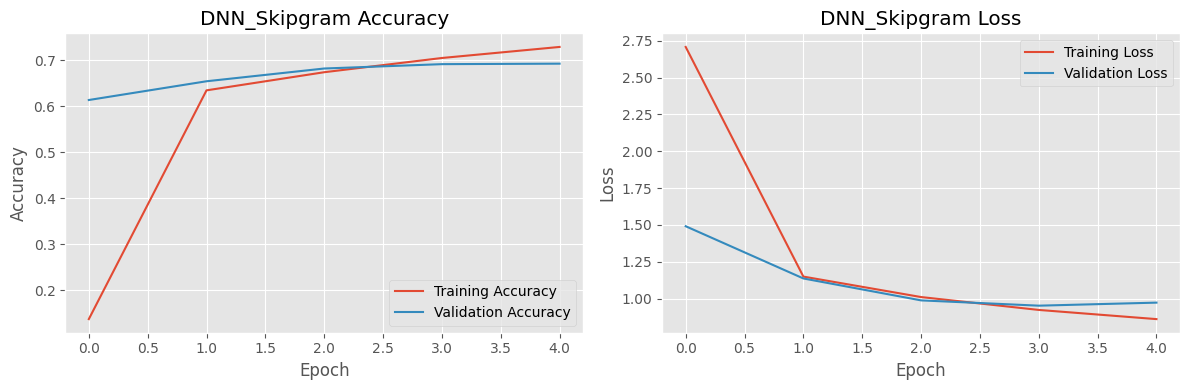

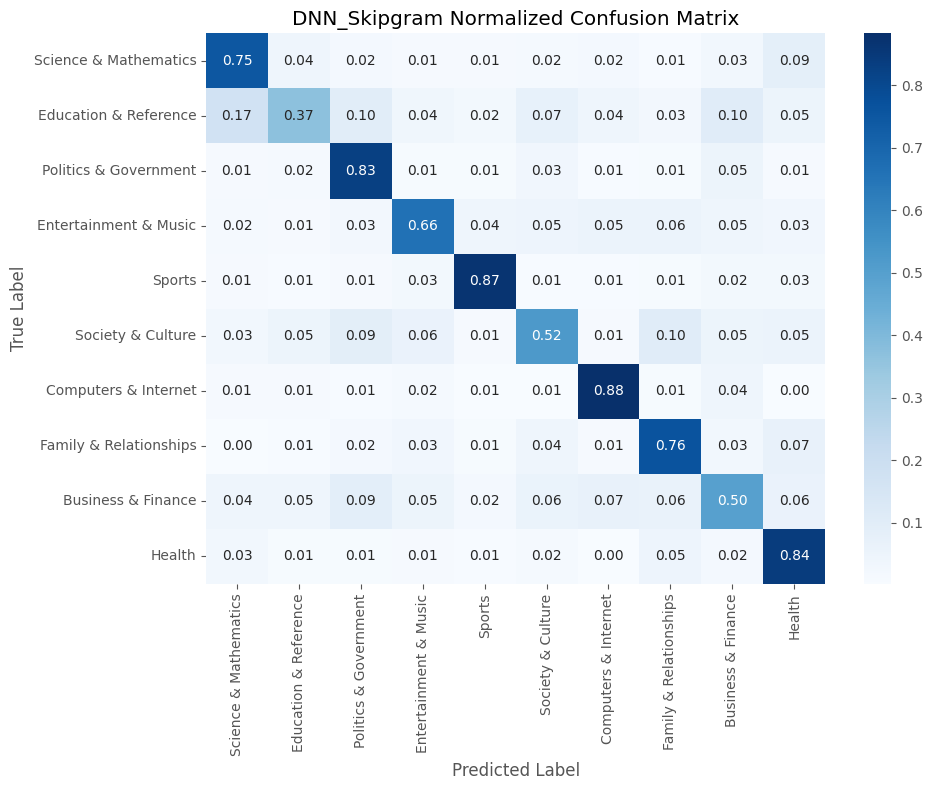

Classification Report for DNN_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.69      0.75      0.72      6000
 Education & Reference       0.64      0.37      0.47      6000
 Politics & Government       0.68      0.83      0.75      6000
 Entertainment & Music       0.71      0.66      0.68      6000
                Sports       0.85      0.87      0.86      6000
     Society & Culture       0.63      0.52      0.57      6000
  Computers & Internet       0.79      0.88      0.83      6000
Family & Relationships       0.69      0.76      0.73      5999
    Business & Finance       0.55      0.50      0.52      6000
                Health       0.68      0.84      0.75      6000

              accuracy                           0.70     59999
             macro avg       0.69      0.70      0.69     59999
          weighted avg       0.69      0.70      0.69     59999

Macro F1: 0.6889, Weighted F1: 0.6889


In [27]:
# # Individual model training cells (run these one by one if needed)

# 1. DNN Model
print("Training DNN Model...")
dnn_model = create_dnn_model()
dnn_result = train_and_evaluate_model(
    dnn_model, X_train, y_train, X_test, y_test, "DNN_Skipgram"
)
results['DNN'] = dnn_result
tf.keras.backend.clear_session()



Training SimpleRNN Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training SimpleRNN_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.1054 - loss: 3.0828
Epoch 1: val_accuracy improved from -inf to 0.57764, saving model to best_SimpleRNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 105s 862ms/step - accuracy: 0.1054 - loss: 3.0828 - val_accuracy: 0.5776 - val_loss: 1.3434 - learning_rate: 0.0020
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.5234 - loss: 1.4323
Epoch 2: val_accuracy improved from 0.57764 to 0.61320, saving model to best_SimpleRNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 91s 828ms/step - accuracy: 0.5234 - loss: 1.4323 - val_accuracy: 0.6132 - val_loss: 1.2105 - learning_rate: 0.0020
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.6015 - loss: 1.2574
Epoch 3: val_accuracy improved from 0.61320 to 0.63648, saving model to best_SimpleRNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 92s 832ms/step - accuracy: 0.6015 - loss: 1.2574 - val_acc

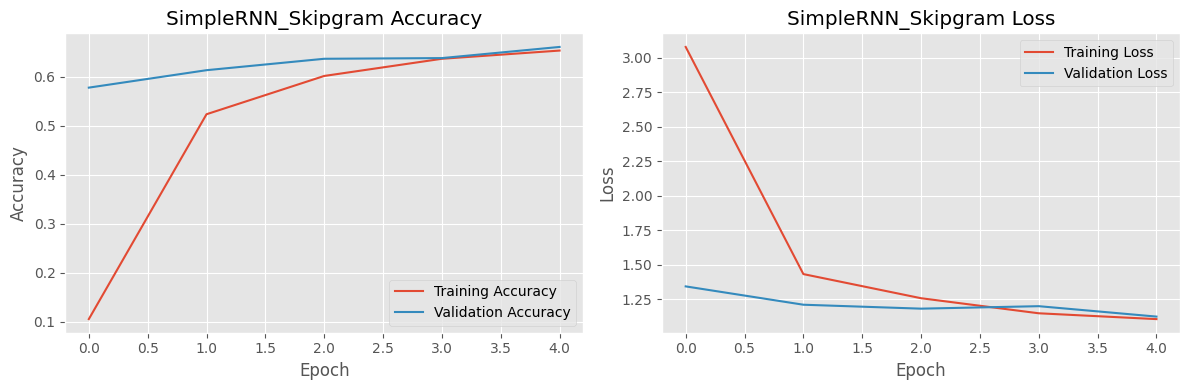

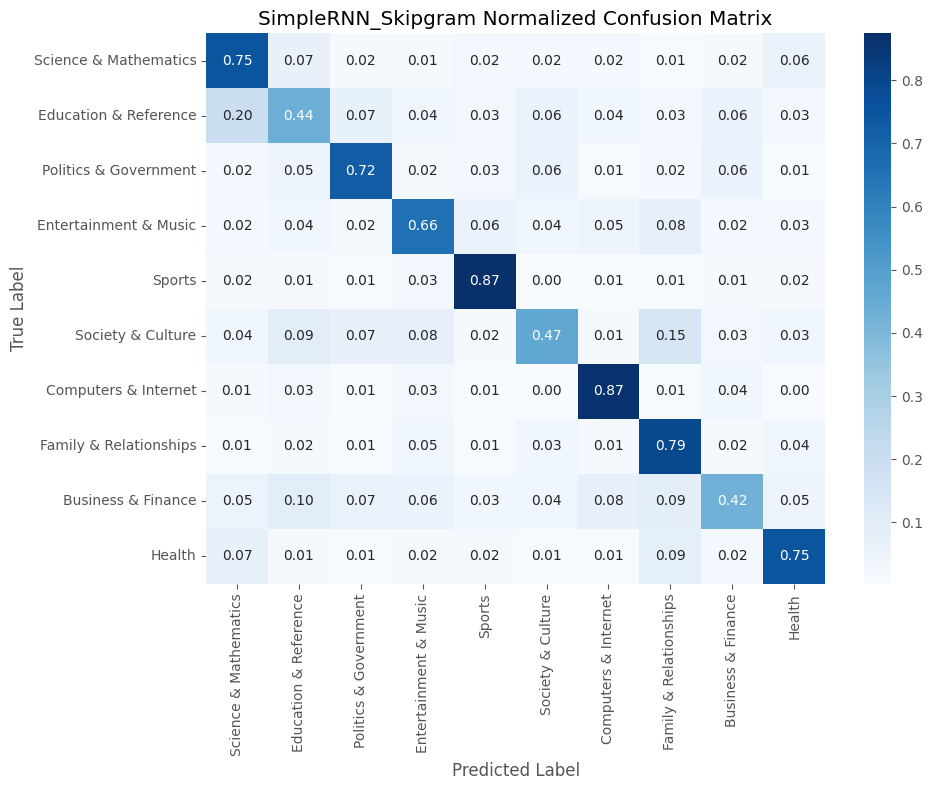

Classification Report for SimpleRNN_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.63      0.75      0.68      6000
 Education & Reference       0.51      0.44      0.47      6000
 Politics & Government       0.72      0.72      0.72      6000
 Entertainment & Music       0.66      0.66      0.66      6000
                Sports       0.79      0.87      0.83      6000
     Society & Culture       0.63      0.47      0.54      6000
  Computers & Internet       0.79      0.87      0.83      6000
Family & Relationships       0.62      0.79      0.70      5999
    Business & Finance       0.60      0.42      0.50      6000
                Health       0.73      0.75      0.74      6000

              accuracy                           0.67     59999
             macro avg       0.67      0.67      0.67     59999
          weighted avg       0.67      0.67      0.67     59999

Macro F1: 0.6667, Weighted F1: 0.6667


In [28]:
# 2. SimpleRNN Model
print("Training SimpleRNN Model...")
rnn_model = create_rnn_model()
rnn_result = train_and_evaluate_model(
    rnn_model, X_train, y_train, X_test, y_test, "SimpleRNN_Skipgram"
)
results['SimpleRNN'] = rnn_result
tf.keras.backend.clear_session()

Training GRU Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training GRU_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1149 - loss: 2.8589
Epoch 1: val_accuracy improved from -inf to 0.64723, saving model to best_GRU_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.1149 - loss: 2.8589 - val_accuracy: 0.6472 - val_loss: 1.3454 - learning_rate: 0.0010
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6420 - loss: 1.1292
Epoch 2: val_accuracy improved from 0.64723 to 0.68886, saving model to best_GRU_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.6420 - loss: 1.1292 - val_accuracy: 0.6889 - val_loss: 1.0108 - learning_rate: 0.0010
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6951 - loss: 0.9712
Epoch 3: val_accuracy improved from 0.68886 to 0.70415, saving model to best_GRU_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.6951 - loss: 0.9712 - val_accuracy: 0.7041 - val_loss: 0.9315 - learn

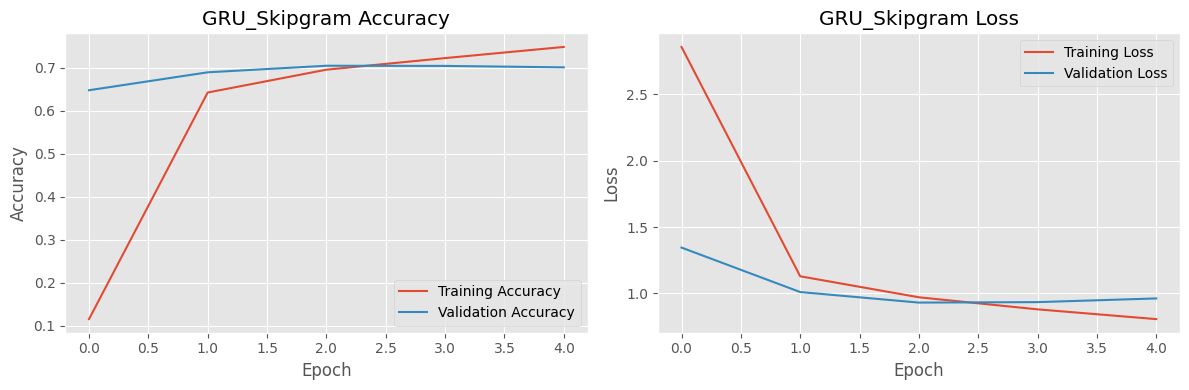

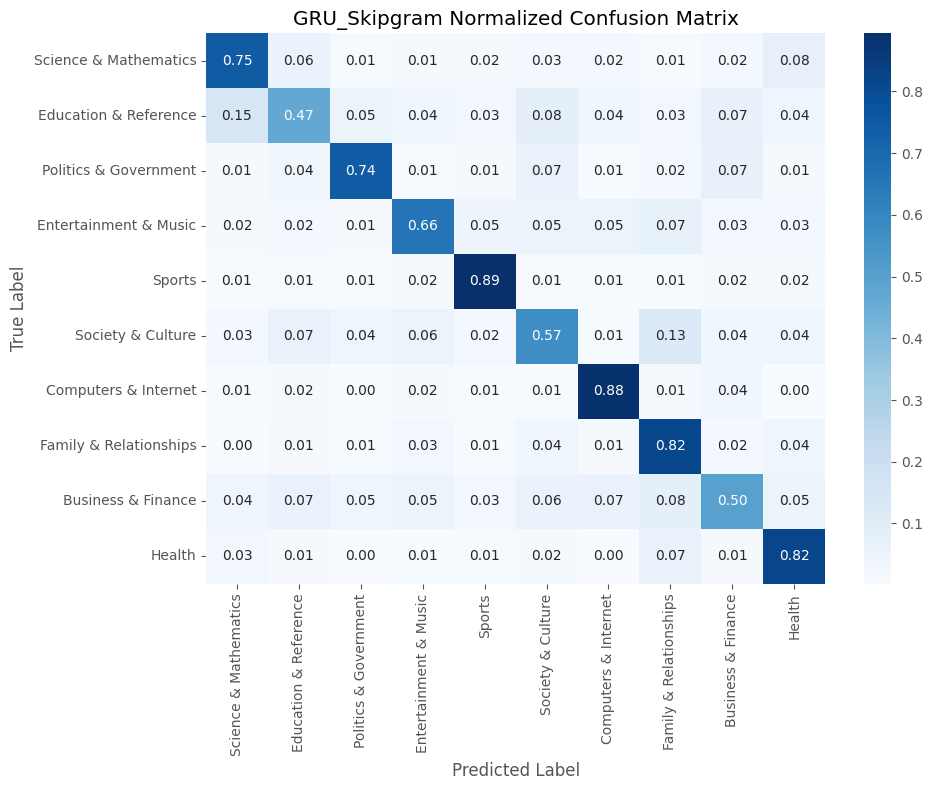

Classification Report for GRU_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.71      0.75      0.73      6000
 Education & Reference       0.60      0.47      0.53      6000
 Politics & Government       0.80      0.74      0.77      6000
 Entertainment & Music       0.73      0.66      0.69      6000
                Sports       0.82      0.89      0.86      6000
     Society & Culture       0.61      0.57      0.59      6000
  Computers & Internet       0.80      0.88      0.84      6000
Family & Relationships       0.65      0.82      0.73      5999
    Business & Finance       0.61      0.50      0.55      6000
                Health       0.72      0.82      0.77      6000

              accuracy                           0.71     59999
             macro avg       0.71      0.71      0.71     59999
          weighted avg       0.71      0.71      0.71     59999

Macro F1: 0.7053, Weighted F1: 0.7053


In [29]:
# 3. GRU Model
print("Training GRU Model...")
gru_model = create_gru_model()
gru_result = train_and_evaluate_model(
    gru_model, X_train, y_train, X_test, y_test, "GRU_Skipgram"
)
results['GRU'] = gru_result
tf.keras.backend.clear_session()

Training LSTM Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training LSTM_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1239 - loss: 2.7856
Epoch 1: val_accuracy improved from -inf to 0.63370, saving model to best_LSTM_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.1239 - loss: 2.7855 - val_accuracy: 0.6337 - val_loss: 1.5838 - learning_rate: 0.0010
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6313 - loss: 1.1627
Epoch 2: val_accuracy improved from 0.63370 to 0.68011, saving model to best_LSTM_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.6313 - loss: 1.1627 - val_accuracy: 0.6801 - val_loss: 1.1540 - learning_rate: 0.0010
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6784 - loss: 1.0085
Epoch 3: val_accuracy improved from 0.68011 to 0.69716, saving model to best_LSTM_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.6784 - loss: 1.0085 - val_accuracy: 0.6972 - val_loss: 0.9690 - l

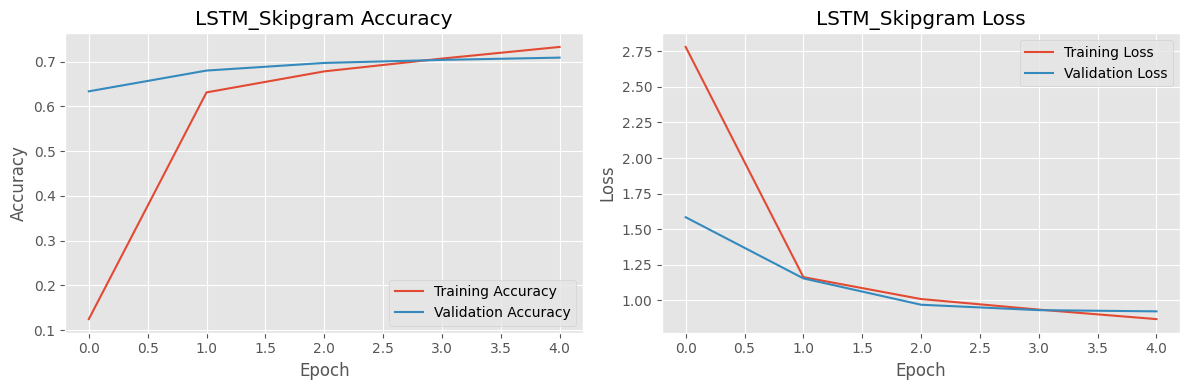

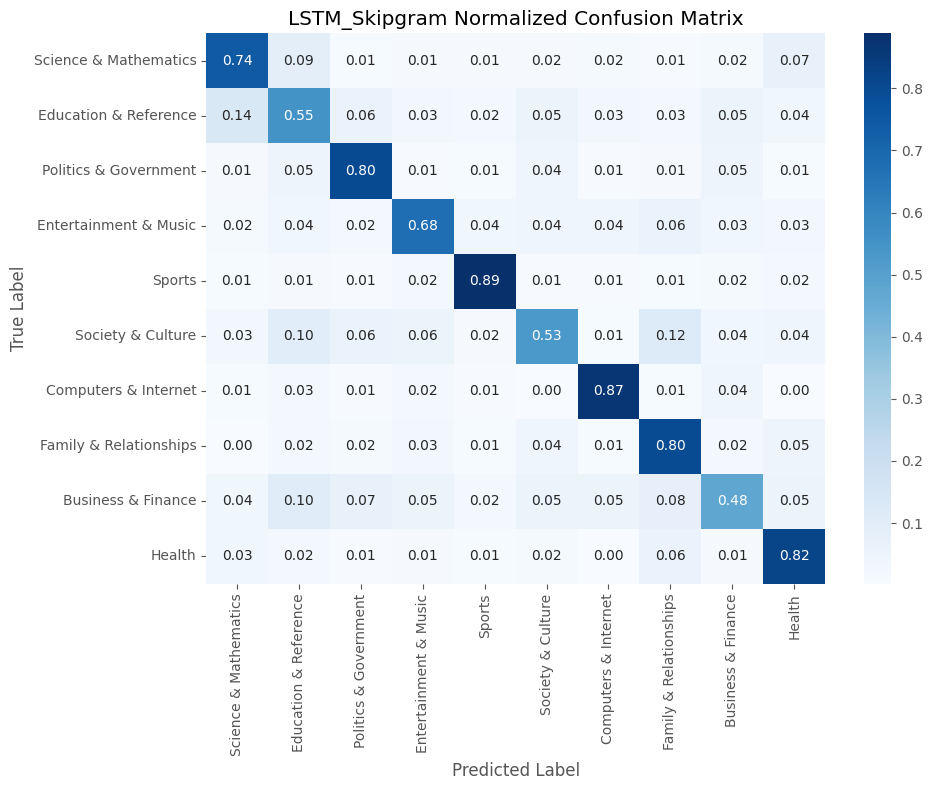

Classification Report for LSTM_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.72      0.74      0.73      6000
 Education & Reference       0.54      0.55      0.55      6000
 Politics & Government       0.75      0.80      0.78      6000
 Entertainment & Music       0.74      0.68      0.71      6000
                Sports       0.86      0.89      0.87      6000
     Society & Culture       0.66      0.53      0.59      6000
  Computers & Internet       0.83      0.87      0.85      6000
Family & Relationships       0.68      0.80      0.73      5999
    Business & Finance       0.63      0.48      0.54      6000
                Health       0.73      0.82      0.77      6000

              accuracy                           0.72     59999
             macro avg       0.71      0.72      0.71     59999
          weighted avg       0.71      0.72      0.71     59999

Macro F1: 0.7113, Weighted F1: 0.7113


In [30]:
# 4. LSTM Model
print("Training LSTM Model...")
lstm_model = create_lstm_model()
lstm_result = train_and_evaluate_model(
    lstm_model, X_train, y_train, X_test, y_test, "LSTM_Skipgram"
)
results['LSTM'] = lstm_result
tf.keras.backend.clear_session()


Training Bidirectional SimpleRNN Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training Bidirectional_SimpleRNN_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.1049 - loss: 3.0440
Epoch 1: val_accuracy improved from -inf to 0.57683, saving model to best_Bidirectional_SimpleRNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 102s 847ms/step - accuracy: 0.1049 - loss: 3.0439 - val_accuracy: 0.5768 - val_loss: 1.3000 - learning_rate: 0.0020
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.5149 - loss: 1.4833
Epoch 2: val_accuracy improved from 0.57683 to 0.62617, saving model to best_Bidirectional_SimpleRNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 92s 837ms/step - accuracy: 0.5149 - loss: 1.4833 - val_accuracy: 0.6262 - val_loss: 1.1716 - learning_rate: 0.0020
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.5948 - loss: 1.2675
Epoch 3: val_accuracy improved from 0.62617 to 0.65150, saving model to best_Bidirectional_SimpleRNN_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 92

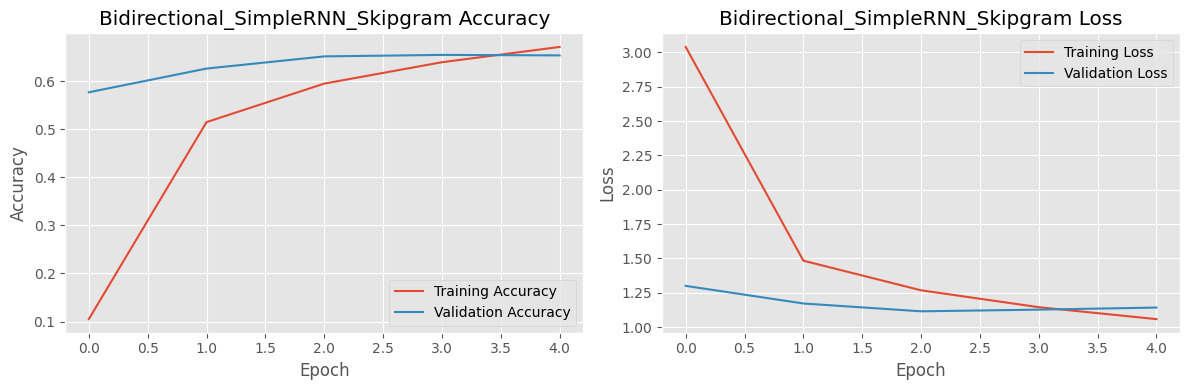

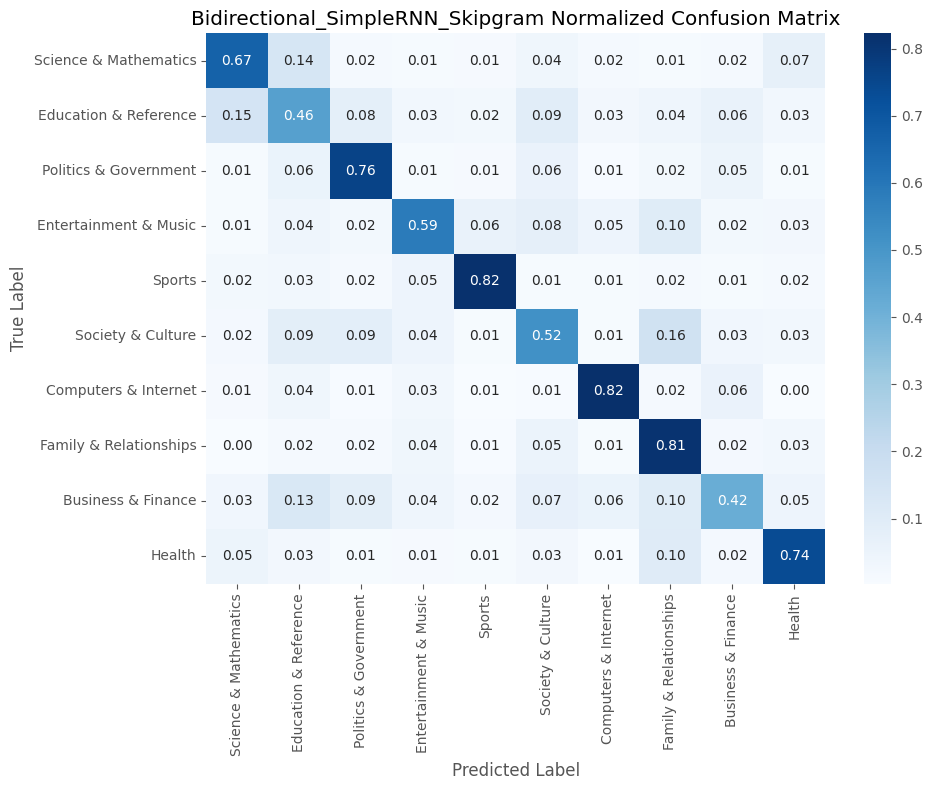

Classification Report for Bidirectional_SimpleRNN_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.68      0.67      0.67      6000
 Education & Reference       0.45      0.46      0.46      6000
 Politics & Government       0.69      0.76      0.72      6000
 Entertainment & Music       0.69      0.59      0.64      6000
                Sports       0.83      0.82      0.82      6000
     Society & Culture       0.54      0.52      0.53      6000
  Computers & Internet       0.82      0.82      0.82      6000
Family & Relationships       0.59      0.81      0.68      5999
    Business & Finance       0.58      0.42      0.49      6000
                Health       0.74      0.74      0.74      6000

              accuracy                           0.66     59999
             macro avg       0.66      0.66      0.66     59999
          weighted avg       0.66      0.66      0.66     59999

Macro F1: 0.6567, Weighted F1: 0.6567


In [31]:

# 5. Bidirectional SimpleRNN
print("Training Bidirectional SimpleRNN Model...")
birnn_model = create_rnn_model(bidirectional=True)
birnn_result = train_and_evaluate_model(
    birnn_model, X_train, y_train, X_test, y_test, "Bidirectional_SimpleRNN_Skipgram"
)
results['Bidirectional_SimpleRNN'] = birnn_result
tf.keras.backend.clear_session()


Training Bidirectional GRU Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training Bidirectional_GRU_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1177 - loss: 2.8566
Epoch 1: val_accuracy improved from -inf to 0.62485, saving model to best_Bidirectional_GRU_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.1177 - loss: 2.8565 - val_accuracy: 0.6248 - val_loss: 1.3603 - learning_rate: 0.0010
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6367 - loss: 1.1386
Epoch 2: val_accuracy improved from 0.62485 to 0.68454, saving model to best_Bidirectional_GRU_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6367 - loss: 1.1386 - val_accuracy: 0.6845 - val_loss: 1.0173 - learning_rate: 0.0010
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6911 - loss: 0.9683
Epoch 3: val_accuracy improved from 0.68454 to 0.70253, saving model to best_Bidirectional_GRU_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6911 - loss: 

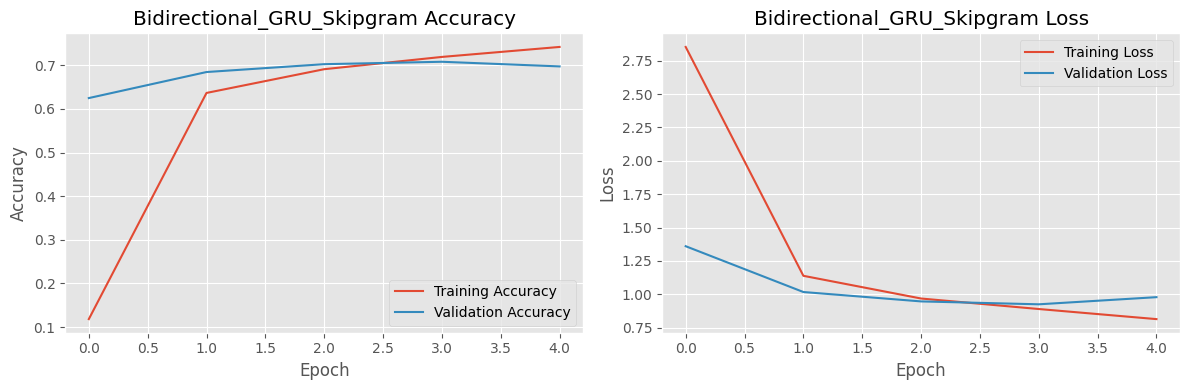

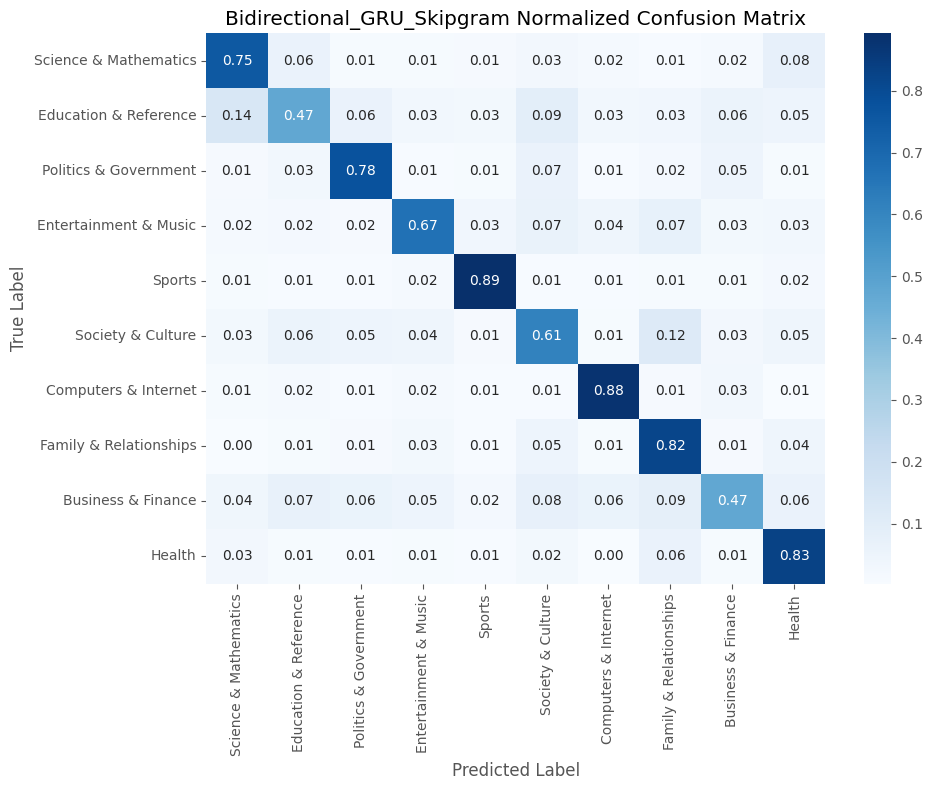

Classification Report for Bidirectional_GRU_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.72      0.75      0.74      6000
 Education & Reference       0.62      0.47      0.54      6000
 Politics & Government       0.77      0.78      0.77      6000
 Entertainment & Music       0.75      0.67      0.71      6000
                Sports       0.86      0.89      0.88      6000
     Society & Culture       0.59      0.61      0.60      6000
  Computers & Internet       0.82      0.88      0.85      6000
Family & Relationships       0.66      0.82      0.73      5999
    Business & Finance       0.66      0.47      0.55      6000
                Health       0.71      0.83      0.76      6000

              accuracy                           0.72     59999
             macro avg       0.72      0.72      0.71     59999
          weighted avg       0.72      0.72      0.71     59999

Macro F1: 0.7128, Weighted F1: 0.7128


In [34]:

# 6. Bidirectional GRU
print("Training Bidirectional GRU Model...")
bigru_model = create_gru_model(bidirectional=True)
bigru_result = train_and_evaluate_model(
    bigru_model, X_train, y_train, X_test, y_test, "Bidirectional_GRU_Skipgram"
)
results['Bidirectional_GRU'] = bigru_result
tf.keras.backend.clear_session()


Training Bidirectional LSTM Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training Bidirectional_LSTM_Skipgram...
Using batch size: 2048 across 2 GPUs
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1142 - loss: 2.7353
Epoch 1: val_accuracy improved from -inf to 0.63840, saving model to best_Bidirectional_LSTM_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.1142 - loss: 2.7353 - val_accuracy: 0.6384 - val_loss: 1.5884 - learning_rate: 0.0010
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6301 - loss: 1.1600
Epoch 2: val_accuracy improved from 0.63840 to 0.67446, saving model to best_Bidirectional_LSTM_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6301 - loss: 1.1600 - val_accuracy: 0.6745 - val_loss: 1.1917 - learning_rate: 0.0010
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6849 - loss: 1.0184
Epoch 3: val_accuracy improved from 0.67446 to 0.69502, saving model to best_Bidirectional_LSTM_Skipgram.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6849 - lo

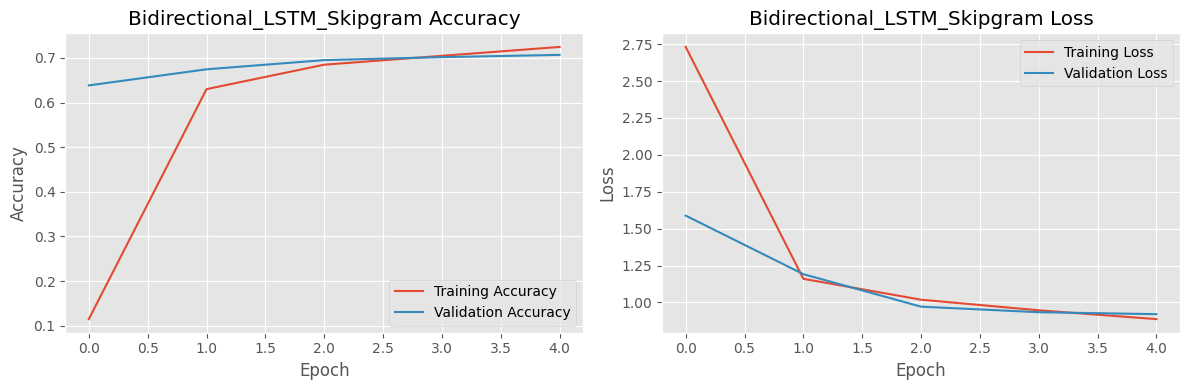

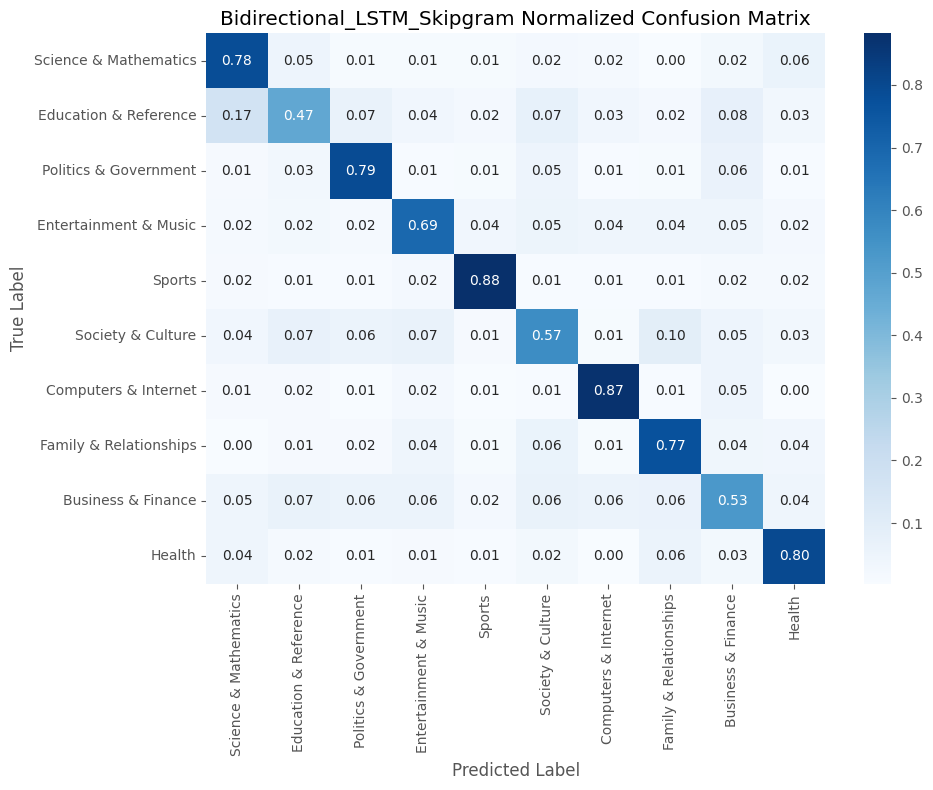

Classification Report for Bidirectional_LSTM_Skipgram:
                        precision    recall  f1-score   support

 Science & Mathematics       0.68      0.78      0.73      6000
 Education & Reference       0.61      0.47      0.53      6000
 Politics & Government       0.76      0.79      0.78      6000
 Entertainment & Music       0.71      0.69      0.70      6000
                Sports       0.86      0.88      0.87      6000
     Society & Culture       0.61      0.57      0.59      6000
  Computers & Internet       0.82      0.87      0.84      6000
Family & Relationships       0.71      0.77      0.74      5999
    Business & Finance       0.57      0.53      0.55      6000
                Health       0.76      0.80      0.78      6000

              accuracy                           0.72     59999
             macro avg       0.71      0.72      0.71     59999
          weighted avg       0.71      0.72      0.71     59999

Macro F1: 0.7111, Weighted F1: 0.7111


In [22]:

# 7. Bidirectional LSTM
print("Training Bidirectional LSTM Model...")
bilstm_model = create_lstm_model(bidirectional=True)
bilstm_result = train_and_evaluate_model(
    bilstm_model, X_train, y_train, X_test, y_test, "Bidirectional_LSTM_Skipgram"
)
results['Bidirectional_LSTM'] = bilstm_result
tf.keras.backend.clear_session()

# Results Comparison and Analysis

In [47]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


#### Stored Data

In [79]:
results = {
    "DNN": {
        "accuracy": 0.6989,
        "f1_score": 0.689,
        "f1_macro": 0.689,  # Added Macro F1
        "training_time": 108.7344,
        "epochs_trained": 5,
        "parameters": 61103222,
        "history": {
            "accuracy": [0.7290],
            "loss": [0.8604],
            "val_accuracy": [0.6926],
            "val_loss": [0.9724],
        },
    },
    "SimpleRNN": {
        "accuracy": 0.675,
        "f1_score": 0.667,
        "f1_macro": 0.667,  # Added Macro F1
        "training_time": 471.7932,
        "epochs_trained": 5,
        "parameters": 60759926,
        "history": {
            "accuracy": [0.6532],
            "loss": [1.1061],
            "val_accuracy": [0.6606],
            "val_loss": [1.1244],
        },
    },
    "GRU": {
        "accuracy": 0.711,
        "f1_score": 0.705,
        "f1_macro": 0.705,  # Added Macro F1
        "training_time": 1048.23,
        "epochs_trained": 5,
        "parameters": 61719542,
        "history": {
            "accuracy": [0.7478],
            "loss": [0.8072],
            "val_accuracy": [0.7004],
            "val_loss": [0.9628],
        },
    },
    "LSTM": {
        "accuracy": 0.716,
        "f1_score": 0.711,
        "f1_macro": 0.711,  # Added Macro F1
        "training_time": 1187.5069,
        "epochs_trained": 5,
        "parameters": 62064118,
        "history": {
            "accuracy": [0.7329],
            "loss": [0.8679],
            "val_accuracy": [0.7090],
            "val_loss": [0.9224],
        },
    },
    "Bidirectional_SimpleRNN": {
        "accuracy": 0.660,
        "f1_score": 0.657,
        "f1_macro": 0.657,  # Added Macro F1
        "training_time": 469.4036,
        "epochs_trained": 5,
        "parameters": 60759926,
        "history": {
            "accuracy": [0.6711],
            "loss": [1.0578],
            "val_accuracy": [0.6536],
            "val_loss": [1.1420],
        },
    },
    "Bidirectional_GRU": {
        "accuracy": 0.719,
        "f1_score": 0.713,
        "f1_macro": 0.713,  # Added Macro F1
        "training_time": 1055.4283,
        "epochs_trained": 5,
        "parameters": 61719542,
        "history": {
            "accuracy": [0.7420],
            "loss": [0.8144],
            "val_accuracy": [0.6974],
            "val_loss": [0.9788],
        },
    },
    "Bidirectional_LSTM": {
        "accuracy": 0.716,
        "f1_score": 0.711,
        "f1_macro": 0.711,  # Added Macro F1
        "training_time": 1146.4614,
        "epochs_trained": 5,
        "parameters": 62064118,
        "history": {
            "accuracy": [
                0.1149, 0.6300, 0.6848, 0.7046, 0.7245
            ],
            "loss": [
                2.7309, 1.1602, 1.0188, 0.9470, 0.8873
            ],
            "val_accuracy": [
                0.6384, 0.6745, 0.6950, 0.7017, 0.7068
            ],
            "val_loss": [
                1.5884, 1.1917, 0.9716, 0.9341, 0.9208
            ],
        },
    },
}


## VISUALIZATION: 1 - INTERACTIVE

In [70]:
# Create comprehensive results comparison with enhanced visualizations
print("Creating comprehensive results comparison...")
comparison_data = []

for model_name, result in results.items():
    history = result['history']
    params = result.get('parameters', 0)  # ✅ use saved params instead of model.count_params()
    comparison_data.append({
        'Model': model_name,
        'Accuracy': result['accuracy'],
        'F1_Score_Weighted': result.get('f1_score', 0),
        'F1_Score_Macro': result.get('f1_macro', result.get('f1_score', 0)),  # ✅ fallback if missing
        'Training_Time_Seconds': result['training_time'],
        'Training_Time_Minutes': result['training_time'] / 60,
        'Epochs_Trained': result.get('epochs_trained', len(history['accuracy'])),
        'Final_Train_Accuracy': history['accuracy'][-1],
        'Final_Val_Accuracy': history['val_accuracy'][-1] if 'val_accuracy' in history else 0,
        'Final_Train_Loss': history['loss'][-1],
        'Final_Val_Loss': history['val_loss'][-1] if 'val_loss' in history else 0,
        'Best_Val_Accuracy': max(history['val_accuracy']) if 'val_accuracy' in history else 0,
        'Parameters': params,
        'Parameters_Millions': params / 1e6,
        'Efficiency_Score': result['accuracy'] / (result['training_time'] / 60),  # Accuracy per minute
        'Overfitting_Gap': history['accuracy'][-1] - (history['val_accuracy'][-1] if 'val_accuracy' in history else 0)
    })


comparison_df = pd.DataFrame(comparison_data)

# Sort by accuracy for better visualization
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("COMPREHENSIVE RESULTS COMPARISON")
print("="*80)
print(comparison_df.round(4).to_string(index=False))

# Create styled table for better readability
styled_df = comparison_df[['Model', 'Accuracy', 'F1_Score_Weighted', 'F1_Score_Macro', 
                          'Training_Time_Minutes', 'Parameters_Millions', 'Efficiency_Score']].copy()
styled_df.columns = ['Model', 'Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 
                    'Time (Min)', 'Params (M)', 'Efficiency']

# Apply conditional formatting
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightcoral' if v else '' for v in is_min]

styled_display = styled_df.style\
    .format({
        'Accuracy': '{:.3f}',
        'F1 (Weighted)': '{:.3f}', 
        'F1 (Macro)': '{:.3f}',
        'Time (Min)': '{:.1f}',
        'Params (M)': '{:.2f}',
        'Efficiency': '{:.4f}'
    })\
    .apply(highlight_max, subset=['Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 'Efficiency'])\
    .apply(highlight_min, subset=['Time (Min)', 'Params (M)'])\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'), ('color', 'white'), ('font-weight', 'bold')]
    }])

print("\n📊 STYLED COMPARISON TABLE:")
display(styled_display)

# Create interactive visualizations with Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set Plotly template
pio.templates.default = "plotly_white"

# Create a comprehensive dashboard with subplots
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        'Model Accuracy Comparison', 'F1 Score Comparison', 
        'Training vs Validation Accuracy', 'Training Time Comparison',
        'Model Size (Parameters)', 'Overfitting Analysis',
        'Training Efficiency', 'Accuracy vs Training Time', 
        'Accuracy vs Efficiency'
    ),
    specs=[
        [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}],
        [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "scatter"}, {"type": "scatter"}]
    ],
    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

# Update layout
fig.update_layout(
    title_text='COMPREHENSIVE MODEL COMPARISON (Skip-gram Embeddings)',
    title_font_size=20,
    title_font_color='darkblue',
    title_x=0.5,
    height=1200,
    width=1400,
    showlegend=True,
    template='plotly_white'
)

# 1. Accuracy comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Accuracy'],
        marker_color=px.colors.qualitative.Set3,
        text=comparison_df['Accuracy'].round(3),
        textposition='auto',
        name='Accuracy',
        hovertemplate='<b>%{x}</b><br>Accuracy: %{y:.3f}<extra></extra>'
    ),
    row=1, col=1
)

# 2. F1 Scores comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['F1_Score_Weighted'],
        name='Weighted F1',
        marker_color='lightblue',
        hovertemplate='<b>%{x}</b><br>Weighted F1: %{y:.3f}<extra></extra>'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['F1_Score_Macro'],
        name='Macro F1',
        marker_color='lightcoral',
        hovertemplate='<b>%{x}</b><br>Macro F1: %{y:.3f}<extra></extra>'
    ),
    row=1, col=2
)

# 3. Training vs Validation Accuracy
fig.add_trace(
    go.Scatter(
        x=comparison_df['Final_Train_Accuracy'],
        y=comparison_df['Final_Val_Accuracy'],
        mode='markers+text',
        text=comparison_df['Model'],
        textposition='top center',
        marker=dict(
            size=15,
            color=comparison_df['Accuracy'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Accuracy")
        ),
        name='Train vs Val',
        hovertemplate='<b>%{text}</b><br>Train Accuracy: %{x:.3f}<br>Val Accuracy: %{y:.3f}<extra></extra>'
    ),
    row=1, col=3
)

# Add reference line
fig.add_shape(
    type="line", line=dict(dash='dash', color='grey'),
    x0=0, y0=0, x1=1, y1=1,
    row=1, col=3
)

# 4. Training time comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Training_Time_Minutes'],
        marker_color=px.colors.qualitative.Pastel,
        text=comparison_df['Training_Time_Minutes'].round(1),
        textposition='auto',
        name='Training Time (min)',
        hovertemplate='<b>%{x}</b><br>Training Time: %{y:.1f} minutes<extra></extra>'
    ),
    row=2, col=1
)

# 5. Parameters comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Parameters_Millions'],
        marker_color=px.colors.qualitative.Set2,
        text=comparison_df['Parameters_Millions'].round(2),
        textposition='auto',
        name='Parameters (M)',
        hovertemplate='<b>%{x}</b><br>Parameters: %{y:.2f}M<extra></extra>'
    ),
    row=2, col=2
)

# 6. Overfitting analysis
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Overfitting_Gap'],
        marker_color=['green' if x <= 0 else 'red' for x in comparison_df['Overfitting_Gap']],
        text=comparison_df['Overfitting_Gap'].round(3),
        textposition='auto',
        name='Overfitting Gap',
        hovertemplate='<b>%{x}</b><br>Overfitting Gap: %{y:.3f}<extra></extra>'
    ),
    row=2, col=3
)

# 7. Efficiency score
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Efficiency_Score'],
        marker_color=px.colors.sequential.Viridis,
        text=comparison_df['Efficiency_Score'].round(4),
        textposition='auto',
        name='Efficiency',
        hovertemplate='<b>%{x}</b><br>Efficiency: %{y:.4f}<extra></extra>'
    ),
    row=3, col=1
)

# 8. Accuracy vs Training Time scatter
fig.add_trace(
    go.Scatter(
        x=comparison_df['Training_Time_Minutes'],
        y=comparison_df['Accuracy'],
        mode='markers',
        text=comparison_df['Model'],
        marker=dict(
            size=comparison_df['Parameters_Millions']*10,
            color=comparison_df['Efficiency_Score'],
            colorscale='Plasma',
            showscale=True,
            colorbar=dict(title="Efficiency")
        ),
        name='Accuracy vs Time',
        hovertemplate='<b>%{text}</b><br>Accuracy: %{y:.3f}<br>Training Time: %{x:.1f} min<extra></extra>'
    ),
    row=3, col=2
)

# 9. Accuracy vs Efficiency scatter
fig.add_trace(
    go.Scatter(
        x=comparison_df['Efficiency_Score'],
        y=comparison_df['Accuracy'],
        mode='markers',
        text=comparison_df['Model'],
        marker=dict(
            size=comparison_df['Parameters_Millions']*10,
            color=comparison_df['Training_Time_Minutes'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Training Time (min)")
        ),
        name='Accuracy vs Efficiency',
        hovertemplate='<b>%{text}</b><br>Accuracy: %{y:.3f}<br>Efficiency: %{x:.4f}<extra></extra>'
    ),
    row=3, col=3
)

# Update axes properties
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_xaxes(tickangle=45, row=2, col=2)
fig.update_xaxes(tickangle=45, row=2, col=3)
fig.update_xaxes(tickangle=45, row=3, col=1)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="F1 Score", row=1, col=2)
fig.update_yaxes(title_text="Validation Accuracy", row=1, col=3)
fig.update_xaxes(title_text="Training Accuracy", row=1, col=3)
fig.update_yaxes(title_text="Time (Minutes)", row=2, col=1)
fig.update_yaxes(title_text="Parameters (Millions)", row=2, col=2)
fig.update_yaxes(title_text="Overfitting Gap", row=2, col=3)
fig.update_yaxes(title_text="Efficiency Score", row=3, col=1)
fig.update_yaxes(title_text="Accuracy", row=3, col=2)
fig.update_xaxes(title_text="Training Time (Minutes)", row=3, col=2)
fig.update_yaxes(title_text="Accuracy", row=3, col=3)
fig.update_xaxes(title_text="Efficiency Score", row=3, col=3)

# Show the interactive plot
fig.show()

# Create a radar chart for comprehensive comparison
categories = ['Accuracy', 'F1_Score_Weighted', 'Efficiency_Score', 'Training_Time_Minutes', 'Parameters_Millions']
categories_norm = [f'{cat}_norm' for cat in categories]

# Normalize values for radar chart (0-1)
radar_df = comparison_df.copy()
for cat in categories:
    radar_df[f'{cat}_norm'] = (radar_df[cat] - radar_df[cat].min()) / (radar_df[cat].max() - radar_df[cat].min())

# Create radar chart
fig_radar = go.Figure()

for i, row in radar_df.iterrows():
    values = row[categories_norm].tolist()
    values += values[:1]  # Close the circle
    
    fig_radar.add_trace(go.Scatterpolar(
        r=values,
        theta=[cat.replace('_', ' ').title() for cat in categories] + 
              [categories[0].replace('_', ' ').title()],
        fill='toself',
        name=row['Model'],
        hovertemplate='<b>%{theta}</b>: %{r:.2f}<extra></extra>'
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Comprehensive Model Comparison (Radar Chart)',
    title_x=0.5,
    height=600,
    width=800
)

fig_radar.show()

# Create training history comparison plot
fig_history = go.Figure()

for model_name, result in results.items():
    history = result['history']
    fig_history.add_trace(go.Scatter(
        x=list(range(1, len(history['accuracy']) + 1)),
        y=history['accuracy'],
        mode='lines',
        name=f'{model_name} (Train)',
        hovertemplate='Epoch: %{x}<br>Accuracy: %{y:.3f}<extra></extra>'
    ))
    
    if 'val_accuracy' in history:
        fig_history.add_trace(go.Scatter(
            x=list(range(1, len(history['val_accuracy']) + 1)),
            y=history['val_accuracy'],
            mode='lines',
            name=f'{model_name} (Validation)',
            line=dict(dash='dash'),
            hovertemplate='Epoch: %{x}<br>Accuracy: %{y:.3f}<extra></extra>'
        ))

fig_history.update_layout(
    title='Training History Comparison',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    hovermode='closest',
    height=600,
    width=1000
)

fig_history.show()

# Detailed analysis and recommendations
print("\n" + "="*80)
print("DETAILED ANALYSIS AND RECOMMENDATIONS")
print("="*80)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
worst_model = comparison_df.loc[comparison_df['Accuracy'].idxmin()]
most_efficient = comparison_df.loc[comparison_df['Efficiency_Score'].idxmax()]
lightest_model = comparison_df.loc[comparison_df['Parameters_Millions'].idxmin()]

print(f"\n🏆 BEST OVERALL MODEL: {best_model['Model']}")
print(f"   📈 Accuracy: {best_model['Accuracy']:.4f}")
print(f"   🎯 F1-Score (Weighted): {best_model['F1_Score_Weighted']:.4f}")
print(f"   ⏱️  Training Time: {best_model['Training_Time_Minutes']:.1f} minutes")
print(f"   🧮 Parameters: {best_model['Parameters_Millions']:.2f}M")

print(f"\n⚡ MOST EFFICIENT MODEL: {most_efficient['Model']}")
print(f"   🚀 Efficiency Score: {most_efficient['Efficiency_Score']:.4f} (Accuracy per minute)")
print(f"   📈 Accuracy: {most_efficient['Accuracy']:.4f}")
print(f"   ⏱️  Training Time: {most_efficient['Training_Time_Minutes']:.1f} minutes")

print(f"\n📉 WORST PERFORMING MODEL: {worst_model['Model']}")
print(f"   📈 Accuracy: {worst_model['Accuracy']:.4f}")
print(f"   ⚠️  Potential issues: Overfitting gap: {worst_model['Overfitting_Gap']:.4f}")

print(f"\n🏋️  LIGHTEST MODEL: {lightest_model['Model']}")
print(f"   🧮 Parameters: {lightest_model['Parameters_Millions']:.2f}M")
print(f"   📈 Accuracy: {lightest_model['Accuracy']:.4f}")

# Additional insights
print(f"\n💡 KEY INSIGHTS:")
print(f"   • Accuracy range: {comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f}")
print(f"   • Training time range: {comparison_df['Training_Time_Minutes'].min():.1f} - {comparison_df['Training_Time_Minutes'].max():.1f} minutes")
print(f"   • Average overfitting gap: {comparison_df['Overfitting_Gap'].mean():.4f}")

# Save all results to a single HTML file
with open('model_comparison_report.html', 'w') as f:
    f.write("""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Model Comparison Report</title>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
        <style>
            body { font-family: Arial, sans-serif; margin: 40px; }
            h1 { color: #2c3e50; text-align: center; }
            h2 { color: #3498db; border-bottom: 2px solid #3498db; padding-bottom: 10px; }
            .summary { background-color: #f8f9fa; padding: 20px; border-radius: 5px; margin-bottom: 20px; }
            .insight { background-color: #e8f4f8; padding: 10px; border-left: 4px solid #3498db; margin: 10px 0; }
        </style>
    </head>
    <body>
        <h1>Comprehensive Model Comparison Report</h1>
    """)
    
    # Add summary
    f.write("<h2>Summary</h2>")
    f.write("<div class='summary'>")
    f.write(f"<p><b>Best Model:</b> {best_model['Model']} (Accuracy: {best_model['Accuracy']:.4f}, Params: {best_model['Parameters_Millions']:.2f}M)</p>")
    f.write(f"<p><b>Most Efficient:</b> {most_efficient['Model']} (Efficiency: {most_efficient['Efficiency_Score']:.4f})</p>")
    f.write(f"<p><b>Lightest Model:</b> {lightest_model['Model']} ({lightest_model['Parameters_Millions']:.2f}M params)</p>")
    f.write("</div>")
    
    # Add key insights
    f.write("<h2>Key Insights</h2>")
    f.write("<div class='insight'>")
    f.write(f"<p>Accuracy range: {comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f}</p>")
    f.write(f"<p>Training time range: {comparison_df['Training_Time_Minutes'].min():.1f} - {comparison_df['Training_Time_Minutes'].max():.1f} minutes</p>")
    f.write(f"<p>Average overfitting gap: {comparison_df['Overfitting_Gap'].mean():.4f}</p>")
    f.write("</div>")
    
    f.write("</body></html>")

print("\n✅ Report generated and saved as 'model_comparison_report.html'")
print("✅ CSV comparison saved as 'skipgram_nn_results_comparison.csv'")
print("✅ Visualizations saved as interactive plots (open in notebook or browser)")


Creating comprehensive results comparison...

COMPREHENSIVE RESULTS COMPARISON
                      Model  Accuracy  F1_Score_Weighted  F1_Score_Macro  Training_Time_Seconds  Training_Time_Minutes  Epochs_Trained  Final_Train_Accuracy  Final_Val_Accuracy  Final_Train_Loss  Final_Val_Loss  Best_Val_Accuracy  Parameters  Parameters_Millions  Efficiency_Score  Overfitting_Gap
          Bidirectional_GRU    0.7185             0.7128          0.7128              1055.4283                17.5905               5                0.7420              0.6974            0.8144          0.9788             0.6974    61719542              61.7195            0.0408           0.0446
                       LSTM    0.7159             0.7113          0.7113              1187.5069                19.7918               5                0.7329              0.7090            0.8679          0.9224             0.7090    62064118              62.0641            0.0362           0.0239
Bidirectional_LSTM_Skipgram

,Model,Accuracy,F1 (Weighted),F1 (Macro),Time (Min),Params (M),Efficiency
5,Bidirectional_GRU,0.719,0.713,0.713,17.6,61.72,0.0408
3,LSTM,0.716,0.711,0.711,19.8,62.06,0.0362
6,Bidirectional_LSTM_Skipgram,0.716,0.711,0.711,19.1,62.06,0.0374
2,GRU,0.711,0.705,0.705,17.5,61.72,0.0407
0,DNN,0.698,0.689,0.689,1.8,61.10,0.3852
1,SimpleRNN,0.675,0.667,0.667,7.9,60.76,0.0858
4,Bidirectional_SimpleRNN,0.660,0.657,0.657,7.8,60.76,0.0844



DETAILED ANALYSIS AND RECOMMENDATIONS

🏆 BEST OVERALL MODEL: Bidirectional_GRU
   📈 Accuracy: 0.7185
   🎯 F1-Score (Weighted): 0.7128
   ⏱️  Training Time: 17.6 minutes
   🧮 Parameters: 61.72M

⚡ MOST EFFICIENT MODEL: DNN
   🚀 Efficiency Score: 0.3852 (Accuracy per minute)
   📈 Accuracy: 0.6981
   ⏱️  Training Time: 1.8 minutes

📉 WORST PERFORMING MODEL: Bidirectional_SimpleRNN
   📈 Accuracy: 0.6601
   ⚠️  Potential issues: Overfitting gap: 0.0175

🏋️  LIGHTEST MODEL: SimpleRNN
   🧮 Parameters: 60.76M
   📈 Accuracy: 0.6746

💡 KEY INSIGHTS:
   • Accuracy range: 0.6601 - 0.7185
   • Training time range: 1.8 - 19.8 minutes
   • Average overfitting gap: 0.0257

✅ Report generated and saved as 'model_comparison_report.html'
✅ CSV comparison saved as 'skipgram_nn_results_comparison.csv'
✅ Visualizations saved as interactive plots (open in notebook or browser)


## VISUALIZATION: 2 - FINALIZED

                  Model  Accuracy  F1_Score_Weighted  F1_Score_Macro  Training_Time_Seconds  Training_Time_Minutes  Epochs_Trained  Final_Train_Accuracy  Final_Val_Accuracy  Final_Train_Loss  Final_Val_Loss  Best_Val_Accuracy  Parameters  Parameters_Millions  Efficiency_Score  Overfitting_Gap
      Bidirectional_GRU    0.7190              0.713           0.713              1055.4283                17.5905               5                0.7420              0.6974            0.8144          0.9788             0.6974    61719542              61.7195            0.0409           0.0446
                   LSTM    0.7160              0.711           0.711              1187.5069                19.7918               5                0.7329              0.7090            0.8679          0.9224             0.7090    62064118              62.0641            0.0362           0.0239
     Bidirectional_LSTM    0.7160              0.711           0.711              1146.4614                19.1077    

,Model,Accuracy,F1 (Weighted),F1 (Macro),Time (Min),Params (M),Efficiency
5,Bidirectional_GRU,0.719,0.713,0.713,17.6,61.72,0.0409
3,LSTM,0.716,0.711,0.711,19.8,62.06,0.0362
6,Bidirectional_LSTM,0.716,0.711,0.711,19.1,62.06,0.0375
2,GRU,0.711,0.705,0.705,17.5,61.72,0.0407
0,DNN,0.699,0.689,0.689,1.8,61.10,0.3857
1,SimpleRNN,0.675,0.667,0.667,7.9,60.76,0.0858
4,Bidirectional_SimpleRNN,0.660,0.657,0.657,7.8,60.76,0.0844


/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 129518 (\N{ABACUS}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 9201 (\N{STOPWATCH}) missing from current font.

/tmp/ipykernel_36/2747006748.py:435: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

/tmp/ipykernel_36/2747006748.py:436: UserWarning:

Glyph 128200 (\N{CHART WITH UPWA

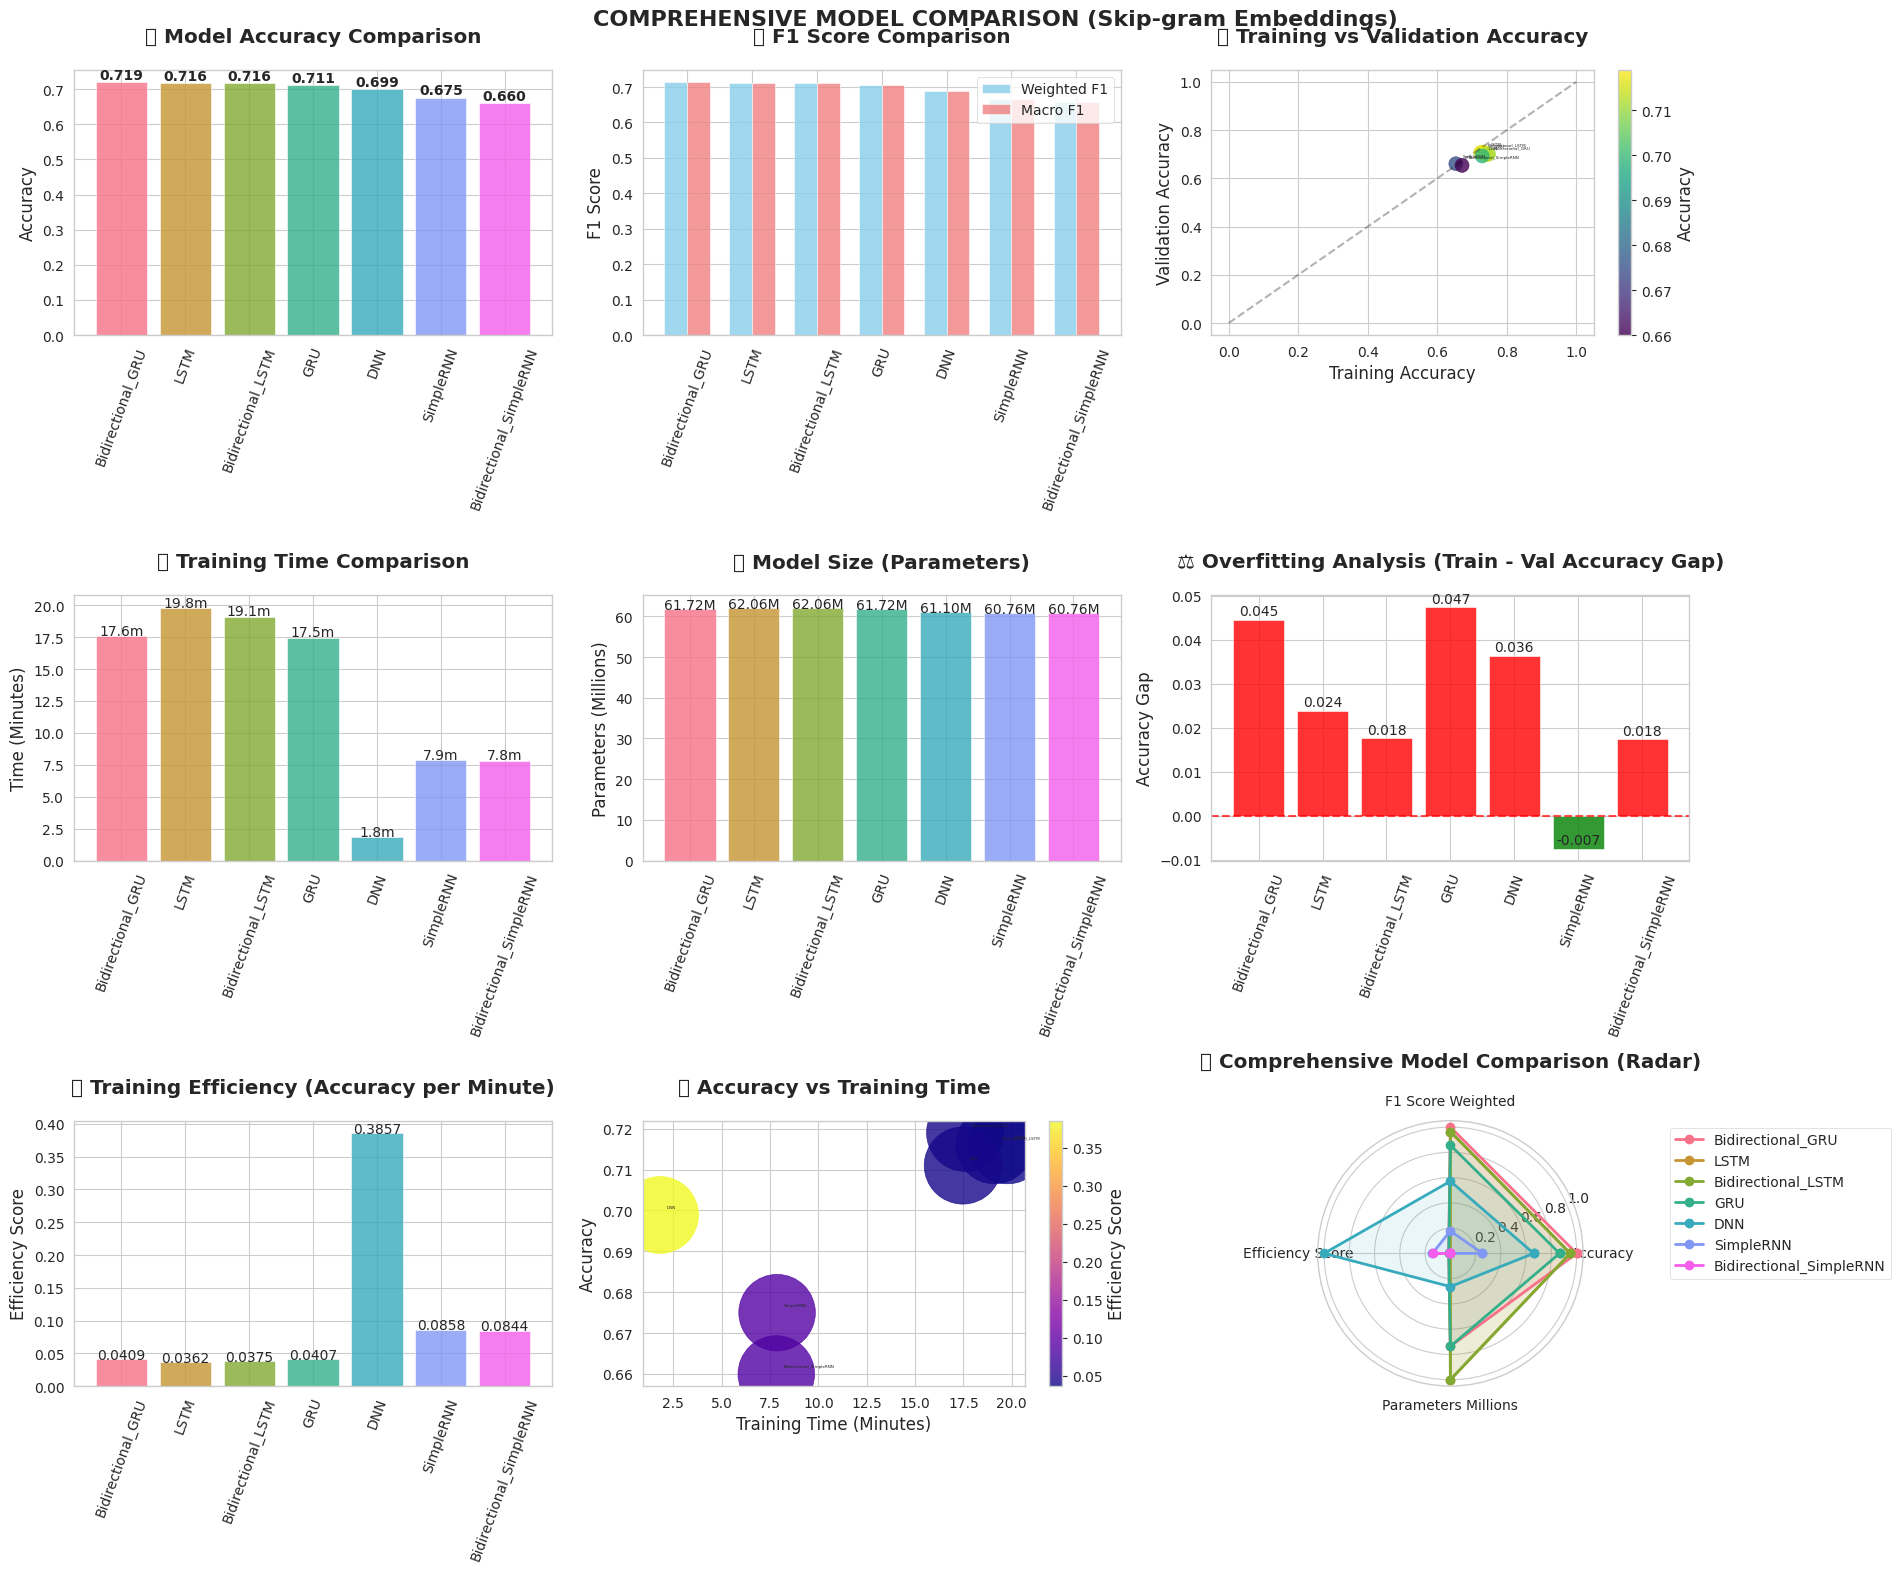


DETAILED ANALYSIS AND RECOMMENDATIONS

🏆 BEST OVERALL MODEL: Bidirectional_GRU
   📈 Accuracy: 0.7190
   🎯 F1-Score (Weighted): 0.7130
   ⏱️  Training Time: 17.6 minutes
   🧮 Parameters: 61.72M

⚡ MOST EFFICIENT MODEL: DNN
   🚀 Efficiency Score: 0.3857 (Accuracy per minute)
   📈 Accuracy: 0.6989
   ⏱️  Training Time: 1.8 minutes

📉 WORST PERFORMING MODEL: Bidirectional_SimpleRNN
   📈 Accuracy: 0.6600
   ⚠️  Potential issues: Overfitting gap: 0.0175

🏋️  LIGHTEST MODEL: SimpleRNN
   🧮 Parameters: 60.76M
   📈 Accuracy: 0.6750

💡 KEY INSIGHTS:
   • Accuracy range: 0.6600 - 0.7190
   • Training time range: 1.8 - 19.8 minutes
   • Average overfitting gap: 0.0257

✅ Results saved to:
   - skipgram_nn_detailed_results.csv
   - skipgram_nn_summary_results.csv
   - skipgram_models_comprehensive_comparison.png
   - skipgram_models_interactive_dashboard.html
   - model_comparison_summary.txt


In [83]:
import pandas as pd
import numpy as np

# --- Build comparison dataframe from results dictionary ---
comparison_data = []

for model_name, result in results.items():
    history = result.get('history', {})
    comparison_data.append({
        'Model': model_name,
        'Accuracy': result.get('accuracy', 0),
        'F1_Score_Weighted': result.get('f1_score', 0),
        'F1_Score_Macro': result.get('f1_macro', 0),
        'Training_Time_Seconds': result.get('training_time', 0),
        'Training_Time_Minutes': result.get('training_time', 0) / 60,
        'Epochs_Trained': result.get('epochs_trained', len(history.get('accuracy', []))),
        'Final_Train_Accuracy': history.get('accuracy', [0])[-1],
        'Final_Val_Accuracy': history.get('val_accuracy', [0])[-1],
        'Final_Train_Loss': history.get('loss', [0])[-1],
        'Final_Val_Loss': history.get('val_loss', [0])[-1],
        'Best_Val_Accuracy': max(history.get('val_accuracy', [0])),
        'Parameters': result.get('parameters', 0),
        'Parameters_Millions': result.get('parameters', 0) / 1e6,
        'Efficiency_Score': result.get('accuracy', 0) / (result.get('training_time', 1)/60),  # accuracy per minute
        'Overfitting_Gap': history.get('accuracy', [0])[-1] - history.get('val_accuracy', [0])[-1]
    })

comparison_df = pd.DataFrame(comparison_data)

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# Fix column display name if needed
comparison_df['Model'] = comparison_df['Model'].replace({'Bidirectional_LSTM_Skipgram': 'Bidirectional_LSTM'})

# Display rounded table
print(comparison_df.round(4).to_string(index=False))



# Create styled table for better readability
styled_df = comparison_df[['Model', 'Accuracy', 'F1_Score_Weighted', 'F1_Score_Macro', 
                          'Training_Time_Minutes', 'Parameters_Millions', 'Efficiency_Score']].copy()
styled_df.columns = ['Model', 'Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 
                    'Time (Min)', 'Params (M)', 'Efficiency']

# Apply conditional formatting
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightcoral' if v else '' for v in is_min]

styled_display = styled_df.style\
    .format({
        'Accuracy': '{:.3f}',
        'F1 (Weighted)': '{:.3f}', 
        'F1 (Macro)': '{:.3f}',
        'Time (Min)': '{:.1f}',
        'Params (M)': '{:.2f}',
        'Efficiency': '{:.4f}'
    })\
    .apply(highlight_max, subset=['Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 'Efficiency'])\
    .apply(highlight_min, subset=['Time (Min)', 'Params (M)'])\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'), ('color', 'white'), ('font-weight', 'bold')]
    }])

print("\n📊 STYLED COMPARISON TABLE:")
display(styled_display)

# Save detailed results
comparison_df.to_csv('skipgram_nn_detailed_results.csv', index=False)
styled_df.to_csv('skipgram_nn_summary_results.csv', index=False)

# Enhanced visual comparison with Plotly and Seaborn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a comprehensive dashboard with Plotly
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        '📈 Model Accuracy Comparison', '🎯 F1 Score Comparison', 
        '🔄 Training vs Validation Accuracy', '⏰ Training Time Comparison',
        '🧮 Model Size (Parameters)', '⚖️ Overfitting Analysis',
        '🚀 Training Efficiency', '⏱️ Accuracy vs Training Time',
        '📊 Comprehensive Model Comparison (Radar)'
    ),
    specs=[
        [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}],
        [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "scatter"}, {"type": "polar"}]
    ],
    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

# Update layout
fig.update_layout(
    title_text='COMPREHENSIVE MODEL COMPARISON (Skip-gram Embeddings)',
    title_font_size=20,
    title_font_color='darkblue',
    title_x=0.5,
    height=1200,
    width=1400,
    showlegend=True,
    template='plotly_white'
)

# 1. Accuracy comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Accuracy'],
        marker_color=px.colors.qualitative.Set3,
        text=comparison_df['Accuracy'].round(3),
        textposition='auto',
        name='Accuracy'
    ),
    row=1, col=1
)

# 2. F1 Scores comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['F1_Score_Weighted'],
        name='Weighted F1',
        marker_color='lightblue'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['F1_Score_Macro'],
        name='Macro F1',
        marker_color='lightcoral'
    ),
    row=1, col=2
)

# 3. Training vs Validation Accuracy
fig.add_trace(
    go.Scatter(
        x=comparison_df['Final_Train_Accuracy'],
        y=comparison_df['Final_Val_Accuracy'],
        mode='markers+text',
        text=comparison_df['Model'],
        textposition='top center',
        marker=dict(
            size=15,
            color=comparison_df['Accuracy'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Accuracy")
        ),
        name='Train vs Val'
    ),
    row=1, col=3
)

# Add reference line
fig.add_shape(
    type="line", line=dict(dash='dash', color='grey'),
    x0=0, y0=0, x1=1, y1=1,
    row=1, col=3
)

# 4. Training time comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Training_Time_Minutes'],
        marker_color=px.colors.qualitative.Pastel,
        text=comparison_df['Training_Time_Minutes'].round(1),
        textposition='auto',
        name='Training Time (min)'
    ),
    row=2, col=1
)

# 5. Parameters comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Parameters_Millions'],
        marker_color=px.colors.qualitative.Set2,
        text=comparison_df['Parameters_Millions'].round(2),
        textposition='auto',
        name='Parameters (M)'
    ),
    row=2, col=2
)

# 6. Overfitting analysis
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Overfitting_Gap'],
        marker_color=['green' if x <= 0 else 'red' for x in comparison_df['Overfitting_Gap']],
        text=comparison_df['Overfitting_Gap'].round(3),
        textposition='auto',
        name='Overfitting Gap'
    ),
    row=2, col=3
)

# 7. Efficiency score
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['Efficiency_Score'],
        marker_color=px.colors.sequential.Viridis,
        text=comparison_df['Efficiency_Score'].round(4),
        textposition='auto',
        name='Efficiency'
    ),
    row=3, col=1
)

# 8. Accuracy vs Training Time scatter
fig.add_trace(
    go.Scatter(
        x=comparison_df['Training_Time_Minutes'],
        y=comparison_df['Accuracy'],
        mode='markers+text',
        text=comparison_df['Model'],
        textposition='top center',
        marker=dict(
            size=comparison_df['Parameters_Millions']*5,  # Scale by parameter count
            color=comparison_df['Efficiency_Score'],
            colorscale='Plasma',
            showscale=True,
            colorbar=dict(title="Efficiency")
        ),
        name='Accuracy vs Time'
    ),
    row=3, col=2
)

# 9. Radar chart for comprehensive comparison
categories = ['Accuracy', 'F1_Score_Weighted', 'Efficiency_Score', 'Parameters_Millions']
categories_norm = [f'{cat}_norm' for cat in categories]

# Normalize values for radar chart (0-1)
radar_df = comparison_df.copy()
for cat in categories:
    radar_df[f'{cat}_norm'] = (radar_df[cat] - radar_df[cat].min()) / (radar_df[cat].max() - radar_df[cat].min())

# Plot radar chart
for i, row in radar_df.iterrows():
    values = row[categories_norm].tolist()
    values += values[:1]  # Close the circle
    
    fig.add_trace(
        go.Scatterpolar(
            r=values,
            theta=[cat.replace('_', ' ').title() for cat in categories] + 
                  [categories[0].replace('_', ' ').title()],
            fill='toself',
            name=row['Model'],
            showlegend=True
        ),
        row=3, col=3
    )

# Update axes properties
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_xaxes(tickangle=45, row=2, col=2)
fig.update_xaxes(tickangle=45, row=2, col=3)
fig.update_xaxes(tickangle=45, row=3, col=1)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="F1 Score", row=1, col=2)
fig.update_yaxes(title_text="Validation Accuracy", row=1, col=3)
fig.update_xaxes(title_text="Training Accuracy", row=1, col=3)
fig.update_yaxes(title_text="Time (Minutes)", row=2, col=1)
fig.update_yaxes(title_text="Parameters (Millions)", row=2, col=2)
fig.update_yaxes(title_text="Overfitting Gap", row=2, col=3)
fig.update_yaxes(title_text="Efficiency Score", row=3, col=1)
fig.update_yaxes(title_text="Accuracy", row=3, col=2)
fig.update_xaxes(title_text="Training Time (Minutes)", row=3, col=2)

# Save the interactive plot
fig.write_html("skipgram_models_interactive_dashboard.html")

# Also create a static version with matplotlib for compatibility
plt.figure(figsize=(20, 16))
plt.suptitle('COMPREHENSIVE MODEL COMPARISON (Skip-gram Embeddings)', 
             fontsize=16, fontweight='bold', y=0.98)

# Create subplot grid
gs = plt.GridSpec(3, 3)

# 1. Accuracy comparison
ax1 = plt.subplot(gs[0, 0])
bars = ax1.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
ax1.set_title('📈 Model Accuracy Comparison', fontweight='bold', pad=20)
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=70,)
for i, (bar, acc) in enumerate(zip(bars, comparison_df['Accuracy'])):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', fontweight='bold')

# 2. F1 Scores comparison
ax2 = plt.subplot(gs[0, 1])
width = 0.35
x = np.arange(len(comparison_df))
ax2.bar(x - width/2, comparison_df['F1_Score_Weighted'], width, 
        label='Weighted F1', alpha=0.8, color='skyblue')
ax2.bar(x + width/2, comparison_df['F1_Score_Macro'], width, 
        label='Macro F1', alpha=0.8, color='lightcoral')
ax2.set_title('🎯 F1 Score Comparison', fontweight='bold', pad=20)
ax2.set_ylabel('F1 Score')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_df['Model'], rotation=70,)
ax2.legend()

# 3. Training vs Validation Accuracy
ax3 = plt.subplot(gs[0, 2])
scatter = ax3.scatter(comparison_df['Final_Train_Accuracy'], comparison_df['Final_Val_Accuracy'], 
                     c=comparison_df['Accuracy'], cmap='viridis', s=100, alpha=0.8)
for i, txt in enumerate(comparison_df['Model']):
    ax3.annotate(txt, (comparison_df['Final_Train_Accuracy'].iloc[i], 
                      comparison_df['Final_Val_Accuracy'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=3)
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3)
ax3.set_xlabel('Training Accuracy')
ax3.set_ylabel('Validation Accuracy')
ax3.set_title('🔄 Training vs Validation Accuracy', fontweight='bold', pad=20)
plt.colorbar(scatter, ax=ax3, label='Accuracy')

# 4. Training time comparison
ax4 = plt.subplot(gs[1, 0])
bars = ax4.bar(comparison_df['Model'], comparison_df['Training_Time_Minutes'], 
               color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
ax4.set_title('⏰ Training Time Comparison', fontweight='bold', pad=20)
ax4.set_ylabel('Time (Minutes)')
ax4.tick_params(axis='x', rotation=70,)
for i, (bar, time_val) in enumerate(zip(bars, comparison_df['Training_Time_Minutes'])):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}m', ha='center')

# 5. Parameters comparison
ax5 = plt.subplot(gs[1, 1])
bars = ax5.bar(comparison_df['Model'], comparison_df['Parameters_Millions'], 
               color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
ax5.set_title('🧮 Model Size (Parameters)', fontweight='bold', pad=20)
ax5.set_ylabel('Parameters (Millions)')
ax5.tick_params(axis='x', rotation=70,)
for i, (bar, params) in enumerate(zip(bars, comparison_df['Parameters_Millions'])):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{params:.2f}M', ha='center')

# 6. Overfitting analysis
ax6 = plt.subplot(gs[1, 2])
colors = ['green' if x <= 0 else 'red' for x in comparison_df['Overfitting_Gap']]
bars = ax6.bar(comparison_df['Model'], comparison_df['Overfitting_Gap'], 
               color=colors, alpha=0.8)
ax6.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax6.set_title('⚖️ Overfitting Analysis (Train - Val Accuracy Gap)', fontweight='bold', pad=20)
ax6.set_ylabel('Accuracy Gap')
ax6.tick_params(axis='x', rotation=70,)
for i, (bar, gap) in enumerate(zip(bars, comparison_df['Overfitting_Gap'])):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{gap:.3f}', ha='center')

# 7. Efficiency score
ax7 = plt.subplot(gs[2, 0])
bars = ax7.bar(comparison_df['Model'], comparison_df['Efficiency_Score'], 
               color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
ax7.set_title('🚀 Training Efficiency (Accuracy per Minute)', fontweight='bold', pad=20)
ax7.set_ylabel('Efficiency Score')
ax7.tick_params(axis='x', rotation=70,)
for i, (bar, eff) in enumerate(zip(bars, comparison_df['Efficiency_Score'])):
    ax7.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{eff:.4f}', ha='center')

# 8. Accuracy vs Training Time scatter
ax8 = plt.subplot(gs[2, 1])
scatter = ax8.scatter(comparison_df['Training_Time_Minutes'], comparison_df['Accuracy'], 
                     c=comparison_df['Efficiency_Score'], cmap='plasma', 
                     s=comparison_df['Parameters_Millions']*50, alpha=0.8)
for i, txt in enumerate(comparison_df['Model']):
    ax8.annotate(txt, (comparison_df['Training_Time_Minutes'].iloc[i], 
                      comparison_df['Accuracy'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=3)
ax8.set_xlabel('Training Time (Minutes)')
ax8.set_ylabel('Accuracy')
ax8.set_title('⏱️ Accuracy vs Training Time', fontweight='bold', pad=20)
plt.colorbar(scatter, ax=ax8, label='Efficiency Score')

# 9. Radar chart
ax9 = plt.subplot(gs[2, 2], polar=True)
categories = ['Accuracy', 'F1_Score_Weighted', 'Efficiency_Score', 'Parameters_Millions']
categories_norm = [f'{cat}_norm' for cat in categories]

# Normalize values for radar chart (0-1)
radar_df = comparison_df.copy()
for cat in categories:
    radar_df[f'{cat}_norm'] = (radar_df[cat] - radar_df[cat].min()) / (radar_df[cat].max() - radar_df[cat].min())

# Plot radar chart
angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]  # Close the circle

colors = sns.color_palette("husl", len(radar_df))
for i, (idx, row) in enumerate(radar_df.iterrows()):
    values = row[categories_norm].tolist()
    values += values[:1]  # Close the circle
    ax9.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors[i])
    ax9.fill(angles, values, alpha=0.1, color=colors[i])

ax9.set_xticks(angles[:-1])
ax9.set_xticklabels([cat.replace('_', ' ').title() for cat in categories])
ax9.set_title('📊 Comprehensive Model Comparison (Radar)', fontweight='bold', pad=20)
ax9.legend(bbox_to_anchor=(1.3, 1), loc='upper left')

plt.tight_layout()
plt.savefig('skipgram_models_comprehensive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed analysis and recommendations
print("\n" + "="*80)
print("DETAILED ANALYSIS AND RECOMMENDATIONS")
print("="*80)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
worst_model = comparison_df.loc[comparison_df['Accuracy'].idxmin()]
most_efficient = comparison_df.loc[comparison_df['Efficiency_Score'].idxmax()]
lightest_model = comparison_df.loc[comparison_df['Parameters_Millions'].idxmin()]

print(f"\n🏆 BEST OVERALL MODEL: {best_model['Model']}")
print(f"   📈 Accuracy: {best_model['Accuracy']:.4f}")
print(f"   🎯 F1-Score (Weighted): {best_model['F1_Score_Weighted']:.4f}")
print(f"   ⏱️  Training Time: {best_model['Training_Time_Minutes']:.1f} minutes")
print(f"   🧮 Parameters: {best_model['Parameters_Millions']:.2f}M")

print(f"\n⚡ MOST EFFICIENT MODEL: {most_efficient['Model']}")
print(f"   🚀 Efficiency Score: {most_efficient['Efficiency_Score']:.4f} (Accuracy per minute)")
print(f"   📈 Accuracy: {most_efficient['Accuracy']:.4f}")
print(f"   ⏱️  Training Time: {most_efficient['Training_Time_Minutes']:.1f} minutes")

print(f"\n📉 WORST PERFORMING MODEL: {worst_model['Model']}")
print(f"   📈 Accuracy: {worst_model['Accuracy']:.4f}")
print(f"   ⚠️  Potential issues: Overfitting gap: {worst_model['Overfitting_Gap']:.4f}")

print(f"\n🏋️  LIGHTEST MODEL: {lightest_model['Model']}")
print(f"   🧮 Parameters: {lightest_model['Parameters_Millions']:.2f}M")
print(f"   📈 Accuracy: {lightest_model['Accuracy']:.4f}")

# Additional insights
print(f"\n💡 KEY INSIGHTS:")
print(f"   • Accuracy range: {comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f}")
print(f"   • Training time range: {comparison_df['Training_Time_Minutes'].min():.1f} - {comparison_df['Training_Time_Minutes'].max():.1f} minutes")
print(f"   • Average overfitting gap: {comparison_df['Overfitting_Gap'].mean():.4f}")

# Save summary report
with open('model_comparison_summary.txt', 'w') as f:
    f.write("MODEL COMPARISON SUMMARY REPORT\n")
    f.write("="*50 + "\n\n")
    f.write(f"Best Model: {best_model['Model']}\n")
    f.write(f"Accuracy: {best_model['Accuracy']:.4f}\n")
    f.write(f"Worst Model: {worst_model['Model']}\n")
    f.write(f"Accuracy: {worst_model['Accuracy']:.4f}\n\n")
    f.write("Detailed Results:\n")
    f.write(comparison_df.round(4).to_string())

print(f"\n✅ Results saved to:")
print("   - skipgram_nn_detailed_results.csv")
print("   - skipgram_nn_summary_results.csv") 
print("   - skipgram_models_comprehensive_comparison.png")
print("   - skipgram_models_interactive_dashboard.html")
print("   - model_comparison_summary.txt")

## VISUALIZATION: 3

Creating results comparison...
Results Comparison Table:
                     Model  Accuracy  F1_Score  Training_Time_Seconds  \
0                      DNN    0.6989     0.689               108.7344   
1                SimpleRNN    0.6750     0.667               471.7932   
2                      GRU    0.7110     0.705              1048.2300   
3                     LSTM    0.7160     0.711              1187.5069   
4  Bidirectional_SimpleRNN    0.6600     0.657               469.4036   
5        Bidirectional_GRU    0.7190     0.713              1055.4283   
6       Bidirectional_LSTM    0.7160     0.711              1146.4614   

   Epochs_Trained  Final_Train_Accuracy  Final_Val_Accuracy  Parameters  
0               5                0.7290              0.6926    61103222  
1               5                0.6532              0.6606    60759926  
2               5                0.7478              0.7004    61719542  
3               5                0.7329              0.7090   

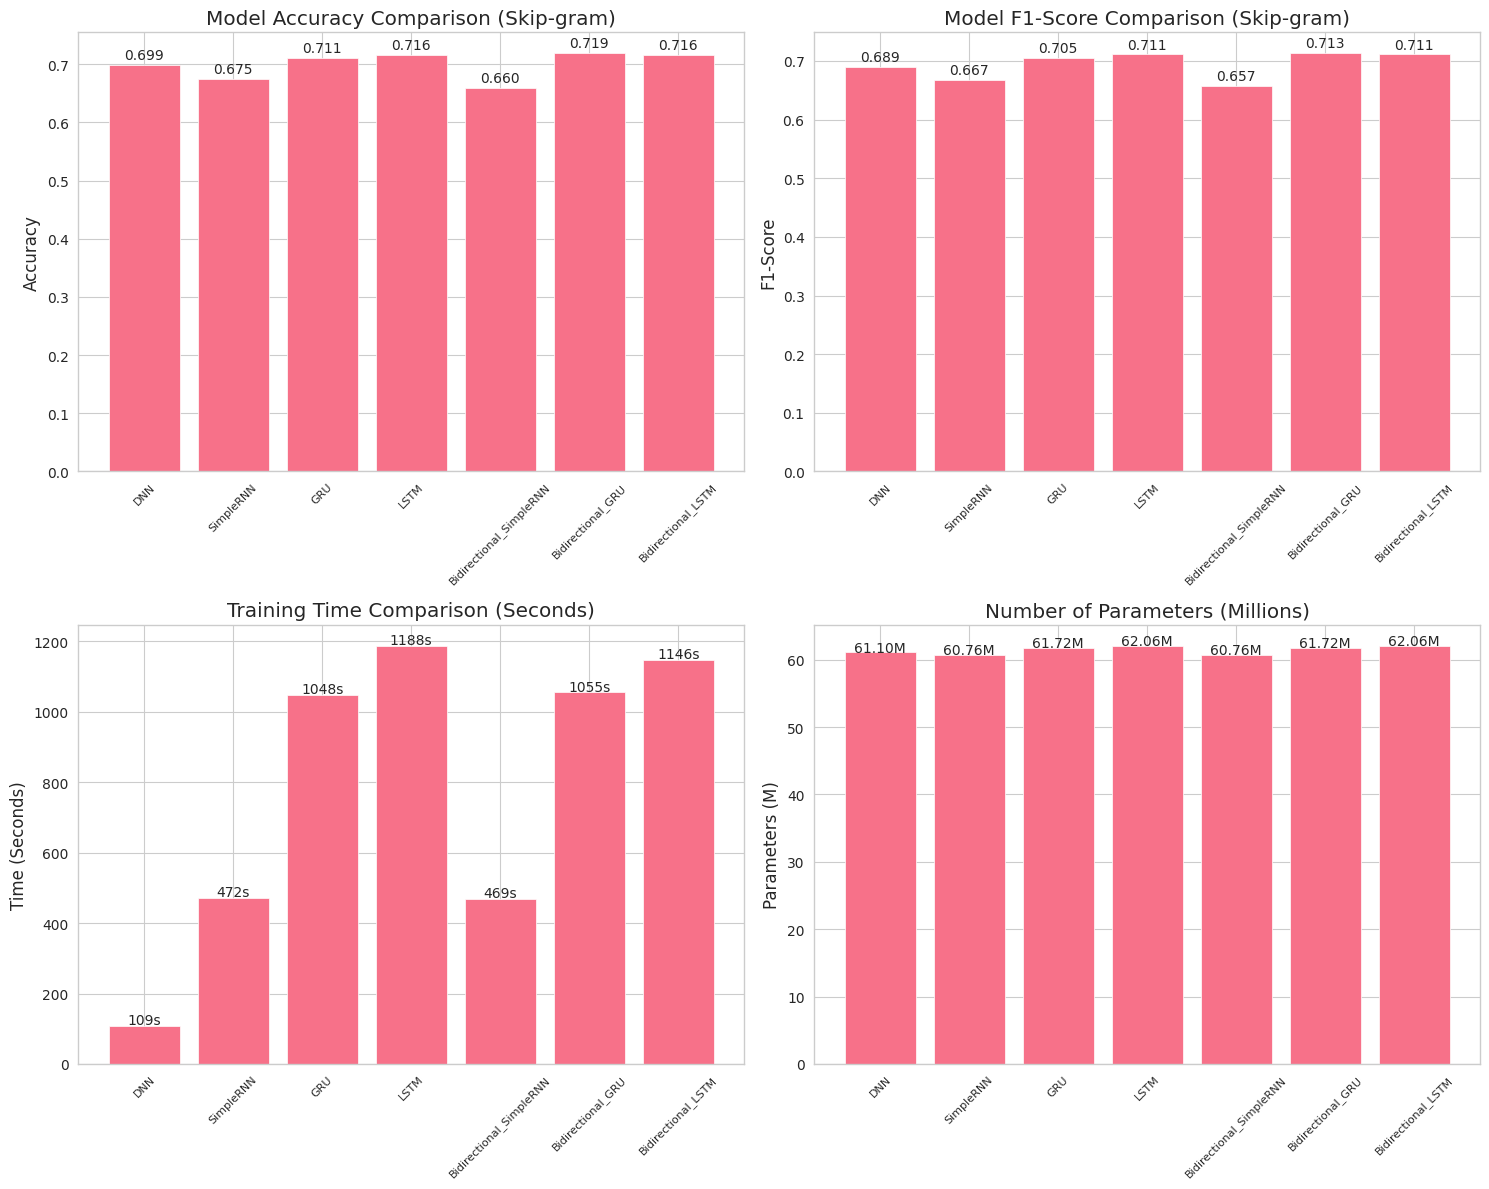


🏆 BEST MODEL: Bidirectional_GRU
   Accuracy: 0.7190
   F1-Score: 0.7130
   Training Time: 1055.43 seconds

📉 WORST MODEL: Bidirectional_SimpleRNN
   Accuracy: 0.6600
   F1-Score: 0.6570
   Training Time: 469.40 seconds


In [84]:
# Create comprehensive results comparison
print("Creating results comparison...")
comparison_data = []

for model_name, result in results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': result['accuracy'],
        'F1_Score': result['f1_score'],
        'Training_Time_Seconds': result['training_time'],
        'Epochs_Trained': result.get('epochs_trained', len(result['history']['accuracy'])),
        'Final_Train_Accuracy': result['history']['accuracy'][-1],
        'Final_Val_Accuracy': result['history']['val_accuracy'][-1] if 'val_accuracy' in result['history'] else 0,
        'Parameters': result.get('parameters', 0)   # ✅ use saved parameter count
    })

comparison_df = pd.DataFrame(comparison_data)
print("Results Comparison Table:")
print(comparison_df.round(4))

# Save results
comparison_df.to_csv('skipgram_nn_results_comparison.csv', index=False)

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'])
axes[0, 0].set_title('Model Accuracy Comparison (Skip-gram)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=8)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# F1-Score comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['F1_Score'])
axes[0, 1].set_title('Model F1-Score Comparison (Skip-gram)')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=8)
for i, v in enumerate(comparison_df['F1_Score']):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Training time comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['Training_Time_Seconds'])
axes[1, 0].set_title('Training Time Comparison (Seconds)')
axes[1, 0].set_ylabel('Time (Seconds)')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)
for i, v in enumerate(comparison_df['Training_Time_Seconds']):
    axes[1, 0].text(i, v + 5, f'{v:.0f}s', ha='center')

# Parameters comparison (in millions)
axes[1, 1].bar(comparison_df['Model'], comparison_df['Parameters'] / 1e6)
axes[1, 1].set_title('Number of Parameters (Millions)')
axes[1, 1].set_ylabel('Parameters (M)')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)
for i, v in enumerate(comparison_df['Parameters'] / 1e6):
    axes[1, 1].text(i, v + 0.1, f'{v:.2f}M', ha='center')

plt.tight_layout()
plt.savefig('skipgram_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Find best and worst models
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
worst_model = comparison_df.loc[comparison_df['Accuracy'].idxmin()]

print(f"\n🏆 BEST MODEL: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   F1-Score: {best_model['F1_Score']:.4f}")
print(f"   Training Time: {best_model['Training_Time_Seconds']:.2f} seconds")

print(f"\n📉 WORST MODEL: {worst_model['Model']}")
print(f"   Accuracy: {worst_model['Accuracy']:.4f}")
print(f"   F1-Score: {worst_model['F1_Score']:.4f}")
print(f"   Training Time: {worst_model['Training_Time_Seconds']:.2f} seconds")


# Reference Code for Analysis - Good to Keep

In [ ]:
# Training History Plot take from here

# ------------------------------------------------------------------

# # Create comprehensive results comparison with enhanced visualizations
# print("Creating comprehensive results comparison...")
# comparison_data = []

# for model_name, result in results.items():
#     history = result['history']
#     comparison_data.append({
#         'Model': model_name,
#         'Accuracy': result['accuracy'],
#         'F1_Score_Weighted': result['f1_score'],
#         'F1_Score_Macro': result['f1_macro'],
#         'Training_Time_Seconds': result['training_time'],
#         'Training_Time_Minutes': result['training_time'] / 60,
#         'Epochs_Trained': result.get('epochs_trained', len(history['accuracy'])),
#         'Final_Train_Accuracy': history['accuracy'][-1],
#         'Final_Val_Accuracy': history['val_accuracy'][-1] if 'val_accuracy' in history else 0,
#         'Final_Train_Loss': history['loss'][-1],
#         'Final_Val_Loss': history['val_loss'][-1] if 'val_loss' in history else 0,
#         'Best_Val_Accuracy': max(history['val_accuracy']) if 'val_accuracy' in history else 0,
#         'Parameters': result['model'].count_params(),
#         'Parameters_Millions': result['model'].count_params() / 1e6,
#         'Efficiency_Score': result['accuracy'] / (result['training_time'] / 60),  # Accuracy per minute
#         'Overfitting_Gap': history['accuracy'][-1] - (history['val_accuracy'][-1] if 'val_accuracy' in history else 0)
#     })

# comparison_df = pd.DataFrame(comparison_data)

# # Sort by accuracy for better visualization
# comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# print("\n" + "="*80)
# print("COMPREHENSIVE RESULTS COMPARISON")
# print("="*80)
# print(comparison_df.round(4).to_string(index=False))

# # Create styled table for better readability
# styled_df = comparison_df[['Model', 'Accuracy', 'F1_Score_Weighted', 'F1_Score_Macro', 
#                           'Training_Time_Minutes', 'Parameters_Millions', 'Efficiency_Score']].copy()
# styled_df.columns = ['Model', 'Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 
#                     'Time (Min)', 'Params (M)', 'Efficiency']

# # Apply conditional formatting
# def highlight_max(s):
#     is_max = s == s.max()
#     return ['background-color: lightgreen' if v else '' for v in is_max]

# def highlight_min(s):
#     is_min = s == s.min()
#     return ['background-color: lightcoral' if v else '' for v in is_min]

# styled_display = styled_df.style\
#     .format({
#         'Accuracy': '{:.3f}',
#         'F1 (Weighted)': '{:.3f}', 
#         'F1 (Macro)': '{:.3f}',
#         'Time (Min)': '{:.1f}',
#         'Params (M)': '{:.2f}',
#         'Efficiency': '{:.4f}'
#     })\
#     .apply(highlight_max, subset=['Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 'Efficiency'])\
#     .apply(highlight_min, subset=['Time (Min)', 'Params (M)'])\
#     .set_properties(**{'text-align': 'center'})\
#     .set_table_styles([{
#         'selector': 'th',
#         'props': [('background-color', '#40466e'), ('color', 'white'), ('font-weight', 'bold')]
#     }])

# print("\n📊 STYLED COMPARISON TABLE:")
# display(styled_display)

# # Create interactive visualizations with Plotly
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.io as pio

# # Set Plotly template
# pio.templates.default = "plotly_white"

# # Create a comprehensive dashboard with subplots
# fig = make_subplots(
#     rows=3, cols=3,
#     subplot_titles=(
#         'Model Accuracy Comparison', 'F1 Score Comparison', 
#         'Training vs Validation Accuracy', 'Training Time Comparison',
#         'Model Size (Parameters)', 'Overfitting Analysis',
#         'Training Efficiency', 'Accuracy vs Training Time', 
#         'Accuracy vs Efficiency'
#     ),
#     specs=[
#         [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}],
#         [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
#         [{"type": "bar"}, {"type": "scatter"}, {"type": "scatter"}]
#     ],
#     vertical_spacing=0.08,
#     horizontal_spacing=0.08
# )

# # Update layout
# fig.update_layout(
#     title_text='COMPREHENSIVE MODEL COMPARISON (Skip-gram Embeddings)',
#     title_font_size=20,
#     title_font_color='darkblue',
#     title_x=0.5,
#     height=1200,
#     width=1400,
#     showlegend=True,
#     template='plotly_white'
# )

# # 1. Accuracy comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Accuracy'],
#         marker_color=px.colors.qualitative.Set3,
#         text=comparison_df['Accuracy'].round(3),
#         textposition='auto',
#         name='Accuracy',
#         hovertemplate='<b>%{x}</b><br>Accuracy: %{y:.3f}<extra></extra>'
#     ),
#     row=1, col=1
# )

# # 2. F1 Scores comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['F1_Score_Weighted'],
#         name='Weighted F1',
#         marker_color='lightblue',
#         hovertemplate='<b>%{x}</b><br>Weighted F1: %{y:.3f}<extra></extra>'
#     ),
#     row=1, col=2
# )

# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['F1_Score_Macro'],
#         name='Macro F1',
#         marker_color='lightcoral',
#         hovertemplate='<b>%{x}</b><br>Macro F1: %{y:.3f}<extra></extra>'
#     ),
#     row=1, col=2
# )

# # 3. Training vs Validation Accuracy
# fig.add_trace(
#     go.Scatter(
#         x=comparison_df['Final_Train_Accuracy'],
#         y=comparison_df['Final_Val_Accuracy'],
#         mode='markers+text',
#         text=comparison_df['Model'],
#         textposition='top center',
#         marker=dict(
#             size=15,
#             color=comparison_df['Accuracy'],
#             colorscale='Viridis',
#             showscale=True,
#             colorbar=dict(title="Accuracy")
#         ),
#         name='Train vs Val',
#         hovertemplate='<b>%{text}</b><br>Train Accuracy: %{x:.3f}<br>Val Accuracy: %{y:.3f}<extra></extra>'
#     ),
#     row=1, col=3
# )

# # Add reference line
# fig.add_shape(
#     type="line", line=dict(dash='dash', color='grey'),
#     x0=0, y0=0, x1=1, y1=1,
#     row=1, col=3
# )

# # 4. Training time comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Training_Time_Minutes'],
#         marker_color=px.colors.qualitative.Pastel,
#         text=comparison_df['Training_Time_Minutes'].round(1),
#         textposition='auto',
#         name='Training Time (min)',
#         hovertemplate='<b>%{x}</b><br>Training Time: %{y:.1f} minutes<extra></extra>'
#     ),
#     row=2, col=1
# )

# # 5. Parameters comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Parameters_Millions'],
#         marker_color=px.colors.qualitative.Set2,
#         text=comparison_df['Parameters_Millions'].round(2),
#         textposition='auto',
#         name='Parameters (M)',
#         hovertemplate='<b>%{x}</b><br>Parameters: %{y:.2f}M<extra></extra>'
#     ),
#     row=2, col=2
# )

# # 6. Overfitting analysis
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Overfitting_Gap'],
#         marker_color=['green' if x <= 0 else 'red' for x in comparison_df['Overfitting_Gap']],
#         text=comparison_df['Overfitting_Gap'].round(3),
#         textposition='auto',
#         name='Overfitting Gap',
#         hovertemplate='<b>%{x}</b><br>Overfitting Gap: %{y:.3f}<extra></extra>'
#     ),
#     row=2, col=3
# )

# # 7. Efficiency score
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Efficiency_Score'],
#         marker_color=px.colors.sequential.Viridis,
#         text=comparison_df['Efficiency_Score'].round(4),
#         textposition='auto',
#         name='Efficiency',
#         hovertemplate='<b>%{x}</b><br>Efficiency: %{y:.4f}<extra></extra>'
#     ),
#     row=3, col=1
# )

# # 8. Accuracy vs Training Time scatter
# fig.add_trace(
#     go.Scatter(
#         x=comparison_df['Training_Time_Minutes'],
#         y=comparison_df['Accuracy'],
#         mode='markers',
#         text=comparison_df['Model'],
#         marker=dict(
#             size=comparison_df['Parameters_Millions']*10,
#             color=comparison_df['Efficiency_Score'],
#             colorscale='Plasma',
#             showscale=True,
#             colorbar=dict(title="Efficiency")
#         ),
#         name='Accuracy vs Time',
#         hovertemplate='<b>%{text}</b><br>Accuracy: %{y:.3f}<br>Training Time: %{x:.1f} min<extra></extra>'
#     ),
#     row=3, col=2
# )

# # 9. Accuracy vs Efficiency scatter
# fig.add_trace(
#     go.Scatter(
#         x=comparison_df['Efficiency_Score'],
#         y=comparison_df['Accuracy'],
#         mode='markers',
#         text=comparison_df['Model'],
#         marker=dict(
#             size=comparison_df['Parameters_Millions']*10,
#             color=comparison_df['Training_Time_Minutes'],
#             colorscale='Viridis',
#             showscale=True,
#             colorbar=dict(title="Training Time (min)")
#         ),
#         name='Accuracy vs Efficiency',
#         hovertemplate='<b>%{text}</b><br>Accuracy: %{y:.3f}<br>Efficiency: %{x:.4f}<extra></extra>'
#     ),
#     row=3, col=3
# )

# # Update axes properties
# fig.update_xaxes(tickangle=45, row=1, col=1)
# fig.update_xaxes(tickangle=45, row=1, col=2)
# fig.update_xaxes(tickangle=45, row=2, col=1)
# fig.update_xaxes(tickangle=45, row=2, col=2)
# fig.update_xaxes(tickangle=45, row=2, col=3)
# fig.update_xaxes(tickangle=45, row=3, col=1)

# fig.update_yaxes(title_text="Accuracy", row=1, col=1)
# fig.update_yaxes(title_text="F1 Score", row=1, col=2)
# fig.update_yaxes(title_text="Validation Accuracy", row=1, col=3)
# fig.update_xaxes(title_text="Training Accuracy", row=1, col=3)
# fig.update_yaxes(title_text="Time (Minutes)", row=2, col=1)
# fig.update_yaxes(title_text="Parameters (Millions)", row=2, col=2)
# fig.update_yaxes(title_text="Overfitting Gap", row=2, col=3)
# fig.update_yaxes(title_text="Efficiency Score", row=3, col=1)
# fig.update_yaxes(title_text="Accuracy", row=3, col=2)
# fig.update_xaxes(title_text="Training Time (Minutes)", row=3, col=2)
# fig.update_yaxes(title_text="Accuracy", row=3, col=3)
# fig.update_xaxes(title_text="Efficiency Score", row=3, col=3)

# # Show the interactive plot
# fig.show()

# # Create a radar chart for comprehensive comparison
# categories = ['Accuracy', 'F1_Score_Weighted', 'Efficiency_Score', 'Training_Time_Minutes', 'Parameters_Millions']
# categories_norm = [f'{cat}_norm' for cat in categories]

# # Normalize values for radar chart (0-1)
# radar_df = comparison_df.copy()
# for cat in categories:
#     radar_df[f'{cat}_norm'] = (radar_df[cat] - radar_df[cat].min()) / (radar_df[cat].max() - radar_df[cat].min())

# # Create radar chart
# fig_radar = go.Figure()

# for i, row in radar_df.iterrows():
#     values = row[categories_norm].tolist()
#     values += values[:1]  # Close the circle
    
#     fig_radar.add_trace(go.Scatterpolar(
#         r=values,
#         theta=[cat.replace('_', ' ').title() for cat in categories] + 
#               [categories[0].replace('_', ' ').title()],
#         fill='toself',
#         name=row['Model'],
#         hovertemplate='<b>%{theta}</b>: %{r:.2f}<extra></extra>'
#     ))

# fig_radar.update_layout(
#     polar=dict(
#         radialaxis=dict(
#             visible=True,
#             range=[0, 1]
#         )),
#     showlegend=True,
#     title='Comprehensive Model Comparison (Radar Chart)',
#     title_x=0.5,
#     height=600,
#     width=800
# )

# fig_radar.show()

# # Create training history comparison plot
# fig_history = go.Figure()

# for model_name, result in results.items():
#     history = result['history']
#     fig_history.add_trace(go.Scatter(
#         x=list(range(1, len(history['accuracy']) + 1)),
#         y=history['accuracy'],
#         mode='lines',
#         name=f'{model_name} (Train)',
#         hovertemplate='Epoch: %{x}<br>Accuracy: %{y:.3f}<extra></extra>'
#     ))
    
#     if 'val_accuracy' in history:
#         fig_history.add_trace(go.Scatter(
#             x=list(range(1, len(history['val_accuracy']) + 1)),
#             y=history['val_accuracy'],
#             mode='lines',
#             name=f'{model_name} (Validation)',
#             line=dict(dash='dash'),
#             hovertemplate='Epoch: %{x}<br>Accuracy: %{y:.3f}<extra></extra>'
#         ))

# fig_history.update_layout(
#     title='Training History Comparison',
#     xaxis_title='Epochs',
#     yaxis_title='Accuracy',
#     hovermode='closest',
#     height=600,
#     width=1000
# )

# fig_history.show()

# # Detailed analysis and recommendations
# print("\n" + "="*80)
# print("DETAILED ANALYSIS AND RECOMMENDATIONS")
# print("="*80)

# best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
# worst_model = comparison_df.loc[comparison_df['Accuracy'].idxmin()]
# most_efficient = comparison_df.loc[comparison_df['Efficiency_Score'].idxmax()]
# lightest_model = comparison_df.loc[comparison_df['Parameters_Millions'].idxmin()]

# print(f"\n🏆 BEST OVERALL MODEL: {best_model['Model']}")
# print(f"   📈 Accuracy: {best_model['Accuracy']:.4f}")
# print(f"   🎯 F1-Score (Weighted): {best_model['F1_Score_Weighted']:.4f}")
# print(f"   ⏱️  Training Time: {best_model['Training_Time_Minutes']:.1f} minutes")
# print(f"   🧮 Parameters: {best_model['Parameters_Millions']:.2f}M")

# print(f"\n⚡ MOST EFFICIENT MODEL: {most_efficient['Model']}")
# print(f"   🚀 Efficiency Score: {most_efficient['Efficiency_Score']:.4f} (Accuracy per minute)")
# print(f"   📈 Accuracy: {most_efficient['Accuracy']:.4f}")
# print(f"   ⏱️  Training Time: {most_efficient['Training_Time_Minutes']:.1f} minutes")

# print(f"\n📉 WORST PERFORMING MODEL: {worst_model['Model']}")
# print(f"   📈 Accuracy: {worst_model['Accuracy']:.4f}")
# print(f"   ⚠️  Potential issues: Overfitting gap: {worst_model['Overfitting_Gap']:.4f}")

# print(f"\n🏋️  LIGHTEST MODEL: {lightest_model['Model']}")
# print(f"   🧮 Parameters: {lightest_model['Parameters_Millions']:.2f}M")
# print(f"   📈 Accuracy: {lightest_model['Accuracy']:.4f}")

# # Additional insights
# print(f"\n💡 KEY INSIGHTS:")
# print(f"   • Accuracy range: {comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f}")
# print(f"   • Training time range: {comparison_df['Training_Time_Minutes'].min():.1f} - {comparison_df['Training_Time_Minutes'].max():.1f} minutes")
# print(f"   • Average overfitting gap: {comparison_df['Overfitting_Gap'].mean():.4f}")

# # Save all results to a single HTML file
# with open('model_comparison_report.html', 'w') as f:
#     f.write("""
#     <!DOCTYPE html>
#     <html>
#     <head>
#         <title>Model Comparison Report</title>
#         <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
#         <style>
#             body { font-family: Arial, sans-serif; margin: 40px; }
#             h1 { color: #2c3e50; text-align: center; }
#             h2 { color: #3498db; border-bottom: 2px solid #3498db; padding-bottom: 10px; }
#             .summary { background-color: #f8f9fa; padding: 20px; border-radius: 5px; margin-bottom: 20px; }
#             .insight { background-color: #e8f4f8; padding: 15px; border-left: 5px solid #3498db; margin: 10px 0; }
#             table { width: 100%; border-collapse: collapse; margin: 20px 0; }
#             th, td { padding: 12px; text-align: left; border-bottom: 1px solid #ddd; }
#             th { background-color: #3498db; color: white; }
#             tr:hover { background-color: #f5f5f5; }
#         </style>
#     </head>
#     <body>
#         <h1>Model Comparison Report</h1>
#         <div class="summary">
#             <h2>Executive Summary</h2>
#             <p><strong>Best Model:</strong> """ + best_model['Model'] + """ (Accuracy: """ + f"{best_model['Accuracy']:.4f}" + """)</p>
#             <p><strong>Most Efficient Model:</strong> """ + most_efficient['Model'] + """ (Efficiency: """ + f"{most_efficient['Efficiency_Score']:.4f}" + """)</p>
#             <p><strong>Lightest Model:</strong> """ + lightest_model['Model'] + """ (Parameters: """ + f"{lightest_model['Parameters_Millions']:.2f}M" + """)</p>
#         </div>
        
#         <h2>Detailed Results</h2>
#         """ + comparison_df.to_html(index=False) + """
        
#         <div class="insight">
#             <h3>Key Insights</h3>
#             <p>• Accuracy range: """ + f"{comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f}" + """</p>
#             <p>• Training time range: """ + f"{comparison_df['Training_Time_Minutes'].min():.1f} - {comparison_df['Training_Time_Minutes'].max():.1f} minutes" + """</p>
#             <p>• Average overfitting gap: """ + f"{comparison_df['Overfitting_Gap'].mean():.4f}" + """</p>
#         </div>
        
#         <h2>Interactive Visualizations</h2>
#         <p>The interactive visualizations are displayed above in your Python environment. To save them, use the camera icon in the Plotly toolbar.</p>
#     </body>
#     </html>
#     """)

# # Save all data to a single Excel file
# with pd.ExcelWriter('model_comparison_results.xlsx') as writer:
#     comparison_df.to_excel(writer, sheet_name='Detailed Results', index=False)
#     styled_df.to_excel(writer, sheet_name='Summary Results', index=False)
    
#     # Add training history for each model
#     for model_name, result in results.items():
#         history_df = pd.DataFrame(result['history'])
#         history_df.to_excel(writer, sheet_name=f'{model_name}_History', index=False)

# print(f"\n✅ All results saved to:")
# print("   - model_comparison_report.html (comprehensive report)")
# print("   - model_comparison_results.xlsx (detailed data)")

In [ ]:
# # Create comprehensive results comparison with enhanced visualizations
# print("Creating comprehensive results comparison...")
# comparison_data = []

# for model_name, result in results.items():
#     history = result['history']
#     comparison_data.append({
#         'Model': model_name,
#         'Accuracy': result['accuracy'],
#         'F1_Score_Weighted': result['f1_score'],
#         'F1_Score_Macro': result['f1_macro'],
#         'Training_Time_Seconds': result['training_time'],
#         'Training_Time_Minutes': result['training_time'] / 60,
#         'Epochs_Trained': result.get('epochs_trained', len(history['accuracy'])),
#         'Final_Train_Accuracy': history['accuracy'][-1],
#         'Final_Val_Accuracy': history['val_accuracy'][-1] if 'val_accuracy' in history else 0,
#         'Final_Train_Loss': history['loss'][-1],
#         'Final_Val_Loss': history['val_loss'][-1] if 'val_loss' in history else 0,
#         'Best_Val_Accuracy': max(history['val_accuracy']) if 'val_accuracy' in history else 0,
#         'Parameters': result['model'].count_params(),
#         'Parameters_Millions': result['model'].count_params() / 1e6,
#         'Efficiency_Score': result['accuracy'] / (result['training_time'] / 60),  # Accuracy per minute
#         'Overfitting_Gap': history['accuracy'][-1] - (history['val_accuracy'][-1] if 'val_accuracy' in history else 0)
#     })

# comparison_df = pd.DataFrame(comparison_data)

# # Sort by accuracy for better visualization
# comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# print("\n" + "="*80)
# print("COMPREHENSIVE RESULTS COMPARISON")
# print("="*80)
# print(comparison_df.round(4).to_string(index=False))

# # Create styled table for better readability
# styled_df = comparison_df[['Model', 'Accuracy', 'F1_Score_Weighted', 'F1_Score_Macro', 
#                           'Training_Time_Minutes', 'Parameters_Millions', 'Efficiency_Score']].copy()
# styled_df.columns = ['Model', 'Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 
#                     'Time (Min)', 'Params (M)', 'Efficiency']

# # Apply conditional formatting
# def highlight_max(s):
#     is_max = s == s.max()
#     return ['background-color: lightgreen' if v else '' for v in is_max]

# def highlight_min(s):
#     is_min = s == s.min()
#     return ['background-color: lightcoral' if v else '' for v in is_min]

# styled_display = styled_df.style\
#     .format({
#         'Accuracy': '{:.3f}',
#         'F1 (Weighted)': '{:.3f}', 
#         'F1 (Macro)': '{:.3f}',
#         'Time (Min)': '{:.1f}',
#         'Params (M)': '{:.2f}',
#         'Efficiency': '{:.4f}'
#     })\
#     .apply(highlight_max, subset=['Accuracy', 'F1 (Weighted)', 'F1 (Macro)', 'Efficiency'])\
#     .apply(highlight_min, subset=['Time (Min)', 'Params (M)'])\
#     .set_properties(**{'text-align': 'center'})\
#     .set_table_styles([{
#         'selector': 'th',
#         'props': [('background-color', '#40466e'), ('color', 'white'), ('font-weight', 'bold')]
#     }])

# print("\n📊 STYLED COMPARISON TABLE:")
# display(styled_display)

# # Save detailed results
# comparison_df.to_csv('skipgram_nn_detailed_results.csv', index=False)
# styled_df.to_csv('skipgram_nn_summary_results.csv', index=False)

# # Enhanced visual comparison with Plotly and Seaborn
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import seaborn as sns

# # Set seaborn style
# sns.set_style("whitegrid")
# sns.set_palette("husl")

# # Create a comprehensive dashboard with Plotly
# fig = make_subplots(
#     rows=3, cols=3,
#     subplot_titles=(
#         '📈 Model Accuracy Comparison', '🎯 F1 Score Comparison', 
#         '🔄 Training vs Validation Accuracy', '⏰ Training Time Comparison',
#         '🧮 Model Size (Parameters)', '⚖️ Overfitting Analysis',
#         '🚀 Training Efficiency', '⏱️ Accuracy vs Training Time',
#         '📊 Comprehensive Model Comparison (Radar)'
#     ),
#     specs=[
#         [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}],
#         [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
#         [{"type": "bar"}, {"type": "scatter"}, {"type": "polar"}]
#     ],
#     vertical_spacing=0.08,
#     horizontal_spacing=0.08
# )

# # Update layout
# fig.update_layout(
#     title_text='COMPREHENSIVE MODEL COMPARISON (Skip-gram Embeddings)',
#     title_font_size=20,
#     title_font_color='darkblue',
#     title_x=0.5,
#     height=1200,
#     width=1400,
#     showlegend=True,
#     template='plotly_white'
# )

# # 1. Accuracy comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Accuracy'],
#         marker_color=px.colors.qualitative.Set3,
#         text=comparison_df['Accuracy'].round(3),
#         textposition='auto',
#         name='Accuracy'
#     ),
#     row=1, col=1
# )

# # 2. F1 Scores comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['F1_Score_Weighted'],
#         name='Weighted F1',
#         marker_color='lightblue'
#     ),
#     row=1, col=2
# )

# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['F1_Score_Macro'],
#         name='Macro F1',
#         marker_color='lightcoral'
#     ),
#     row=1, col=2
# )

# # 3. Training vs Validation Accuracy
# fig.add_trace(
#     go.Scatter(
#         x=comparison_df['Final_Train_Accuracy'],
#         y=comparison_df['Final_Val_Accuracy'],
#         mode='markers+text',
#         text=comparison_df['Model'],
#         textposition='top center',
#         marker=dict(
#             size=15,
#             color=comparison_df['Accuracy'],
#             colorscale='Viridis',
#             showscale=True,
#             colorbar=dict(title="Accuracy")
#         ),
#         name='Train vs Val'
#     ),
#     row=1, col=3
# )

# # Add reference line
# fig.add_shape(
#     type="line", line=dict(dash='dash', color='grey'),
#     x0=0, y0=0, x1=1, y1=1,
#     row=1, col=3
# )

# # 4. Training time comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Training_Time_Minutes'],
#         marker_color=px.colors.qualitative.Pastel,
#         text=comparison_df['Training_Time_Minutes'].round(1),
#         textposition='auto',
#         name='Training Time (min)'
#     ),
#     row=2, col=1
# )

# # 5. Parameters comparison
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Parameters_Millions'],
#         marker_color=px.colors.qualitative.Set2,
#         text=comparison_df['Parameters_Millions'].round(2),
#         textposition='auto',
#         name='Parameters (M)'
#     ),
#     row=2, col=2
# )

# # 6. Overfitting analysis
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Overfitting_Gap'],
#         marker_color=['green' if x <= 0 else 'red' for x in comparison_df['Overfitting_Gap']],
#         text=comparison_df['Overfitting_Gap'].round(3),
#         textposition='auto',
#         name='Overfitting Gap'
#     ),
#     row=2, col=3
# )

# # 7. Efficiency score
# fig.add_trace(
#     go.Bar(
#         x=comparison_df['Model'],
#         y=comparison_df['Efficiency_Score'],
#         marker_color=px.colors.sequential.Viridis,
#         text=comparison_df['Efficiency_Score'].round(4),
#         textposition='auto',
#         name='Efficiency'
#     ),
#     row=3, col=1
# )

# # 8. Accuracy vs Training Time scatter
# fig.add_trace(
#     go.Scatter(
#         x=comparison_df['Training_Time_Minutes'],
#         y=comparison_df['Accuracy'],
#         mode='markers+text',
#         text=comparison_df['Model'],
#         textposition='top center',
#         marker=dict(
#             size=comparison_df['Parameters_Millions']*5,  # Scale by parameter count
#             color=comparison_df['Efficiency_Score'],
#             colorscale='Plasma',
#             showscale=True,
#             colorbar=dict(title="Efficiency")
#         ),
#         name='Accuracy vs Time'
#     ),
#     row=3, col=2
# )

# # 9. Radar chart for comprehensive comparison
# categories = ['Accuracy', 'F1_Score_Weighted', 'Efficiency_Score', 'Parameters_Millions']
# categories_norm = [f'{cat}_norm' for cat in categories]

# # Normalize values for radar chart (0-1)
# radar_df = comparison_df.copy()
# for cat in categories:
#     radar_df[f'{cat}_norm'] = (radar_df[cat] - radar_df[cat].min()) / (radar_df[cat].max() - radar_df[cat].min())

# # Plot radar chart
# for i, row in radar_df.iterrows():
#     values = row[categories_norm].tolist()
#     values += values[:1]  # Close the circle
    
#     fig.add_trace(
#         go.Scatterpolar(
#             r=values,
#             theta=[cat.replace('_', ' ').title() for cat in categories] + 
#                   [categories[0].replace('_', ' ').title()],
#             fill='toself',
#             name=row['Model'],
#             showlegend=True
#         ),
#         row=3, col=3
#     )

# # Update axes properties
# fig.update_xaxes(tickangle=45, row=1, col=1)
# fig.update_xaxes(tickangle=45, row=1, col=2)
# fig.update_xaxes(tickangle=45, row=2, col=1)
# fig.update_xaxes(tickangle=45, row=2, col=2)
# fig.update_xaxes(tickangle=45, row=2, col=3)
# fig.update_xaxes(tickangle=45, row=3, col=1)

# fig.update_yaxes(title_text="Accuracy", row=1, col=1)
# fig.update_yaxes(title_text="F1 Score", row=1, col=2)
# fig.update_yaxes(title_text="Validation Accuracy", row=1, col=3)
# fig.update_xaxes(title_text="Training Accuracy", row=1, col=3)
# fig.update_yaxes(title_text="Time (Minutes)", row=2, col=1)
# fig.update_yaxes(title_text="Parameters (Millions)", row=2, col=2)
# fig.update_yaxes(title_text="Overfitting Gap", row=2, col=3)
# fig.update_yaxes(title_text="Efficiency Score", row=3, col=1)
# fig.update_yaxes(title_text="Accuracy", row=3, col=2)
# fig.update_xaxes(title_text="Training Time (Minutes)", row=3, col=2)

# # Save the interactive plot
# fig.write_html("skipgram_models_interactive_dashboard.html")

# # Also create a static version with matplotlib for compatibility
# plt.figure(figsize=(20, 16))
# plt.suptitle('COMPREHENSIVE MODEL COMPARISON (Skip-gram Embeddings)', 
#              fontsize=16, fontweight='bold', y=0.98)

# # Create subplot grid
# gs = plt.GridSpec(3, 3)

# # 1. Accuracy comparison
# ax1 = plt.subplot(gs[0, 0])
# bars = ax1.bar(comparison_df['Model'], comparison_df['Accuracy'], 
#                color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
# ax1.set_title('📈 Model Accuracy Comparison', fontweight='bold', pad=20)
# ax1.set_ylabel('Accuracy')
# ax1.tick_params(axis='x', rotation=45)
# for i, (bar, acc) in enumerate(zip(bars, comparison_df['Accuracy'])):
#     ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
#              f'{acc:.3f}', ha='center', fontweight='bold')

# # 2. F1 Scores comparison
# ax2 = plt.subplot(gs[0, 1])
# width = 0.35
# x = np.arange(len(comparison_df))
# ax2.bar(x - width/2, comparison_df['F1_Score_Weighted'], width, 
#         label='Weighted F1', alpha=0.8, color='skyblue')
# ax2.bar(x + width/2, comparison_df['F1_Score_Macro'], width, 
#         label='Macro F1', alpha=0.8, color='lightcoral')
# ax2.set_title('🎯 F1 Score Comparison', fontweight='bold', pad=20)
# ax2.set_ylabel('F1 Score')
# ax2.set_xticks(x)
# ax2.set_xticklabels(comparison_df['Model'], rotation=45)
# ax2.legend()

# # 3. Training vs Validation Accuracy
# ax3 = plt.subplot(gs[0, 2])
# scatter = ax3.scatter(comparison_df['Final_Train_Accuracy'], comparison_df['Final_Val_Accuracy'], 
#                      c=comparison_df['Accuracy'], cmap='viridis', s=100, alpha=0.8)
# for i, txt in enumerate(comparison_df['Model']):
#     ax3.annotate(txt, (comparison_df['Final_Train_Accuracy'].iloc[i], 
#                       comparison_df['Final_Val_Accuracy'].iloc[i]),
#                 xytext=(5, 5), textcoords='offset points', fontsize=8)
# ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3)
# ax3.set_xlabel('Training Accuracy')
# ax3.set_ylabel('Validation Accuracy')
# ax3.set_title('🔄 Training vs Validation Accuracy', fontweight='bold', pad=20)
# plt.colorbar(scatter, ax=ax3, label='Accuracy')

# # 4. Training time comparison
# ax4 = plt.subplot(gs[1, 0])
# bars = ax4.bar(comparison_df['Model'], comparison_df['Training_Time_Minutes'], 
#                color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
# ax4.set_title('⏰ Training Time Comparison', fontweight='bold', pad=20)
# ax4.set_ylabel('Time (Minutes)')
# ax4.tick_params(axis='x', rotation=45)
# for i, (bar, time_val) in enumerate(zip(bars, comparison_df['Training_Time_Minutes'])):
#     ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
#              f'{time_val:.1f}m', ha='center')

# # 5. Parameters comparison
# ax5 = plt.subplot(gs[1, 1])
# bars = ax5.bar(comparison_df['Model'], comparison_df['Parameters_Millions'], 
#                color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
# ax5.set_title('🧮 Model Size (Parameters)', fontweight='bold', pad=20)
# ax5.set_ylabel('Parameters (Millions)')
# ax5.tick_params(axis='x', rotation=45)
# for i, (bar, params) in enumerate(zip(bars, comparison_df['Parameters_Millions'])):
#     ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
#              f'{params:.2f}M', ha='center')

# # 6. Overfitting analysis
# ax6 = plt.subplot(gs[1, 2])
# colors = ['green' if x <= 0 else 'red' for x in comparison_df['Overfitting_Gap']]
# bars = ax6.bar(comparison_df['Model'], comparison_df['Overfitting_Gap'], 
#                color=colors, alpha=0.8)
# ax6.axhline(y=0, color='red', linestyle='--', alpha=0.7)
# ax6.set_title('⚖️ Overfitting Analysis (Train - Val Accuracy Gap)', fontweight='bold', pad=20)
# ax6.set_ylabel('Accuracy Gap')
# ax6.tick_params(axis='x', rotation=45)
# for i, (bar, gap) in enumerate(zip(bars, comparison_df['Overfitting_Gap'])):
#     ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
#              f'{gap:.3f}', ha='center')

# # 7. Efficiency score
# ax7 = plt.subplot(gs[2, 0])
# bars = ax7.bar(comparison_df['Model'], comparison_df['Efficiency_Score'], 
#                color=sns.color_palette("husl", len(comparison_df)), alpha=0.8)
# ax7.set_title('🚀 Training Efficiency (Accuracy per Minute)', fontweight='bold', pad=20)
# ax7.set_ylabel('Efficiency Score')
# ax7.tick_params(axis='x', rotation=45)
# for i, (bar, eff) in enumerate(zip(bars, comparison_df['Efficiency_Score'])):
#     ax7.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
#              f'{eff:.4f}', ha='center')

# # 8. Accuracy vs Training Time scatter
# ax8 = plt.subplot(gs[2, 1])
# scatter = ax8.scatter(comparison_df['Training_Time_Minutes'], comparison_df['Accuracy'], 
#                      c=comparison_df['Efficiency_Score'], cmap='plasma', 
#                      s=comparison_df['Parameters_Millions']*50, alpha=0.8)
# for i, txt in enumerate(comparison_df['Model']):
#     ax8.annotate(txt, (comparison_df['Training_Time_Minutes'].iloc[i], 
#                       comparison_df['Accuracy'].iloc[i]),
#                 xytext=(5, 5), textcoords='offset points', fontsize=8)
# ax8.set_xlabel('Training Time (Minutes)')
# ax8.set_ylabel('Accuracy')
# ax8.set_title('⏱️ Accuracy vs Training Time', fontweight='bold', pad=20)
# plt.colorbar(scatter, ax=ax8, label='Efficiency Score')

# # 9. Radar chart
# ax9 = plt.subplot(gs[2, 2], polar=True)
# categories = ['Accuracy', 'F1_Score_Weighted', 'Efficiency_Score', 'Parameters_Millions']
# categories_norm = [f'{cat}_norm' for cat in categories]

# # Normalize values for radar chart (0-1)
# radar_df = comparison_df.copy()
# for cat in categories:
#     radar_df[f'{cat}_norm'] = (radar_df[cat] - radar_df[cat].min()) / (radar_df[cat].max() - radar_df[cat].min())

# # Plot radar chart
# angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
# angles += angles[:1]  # Close the circle

# colors = sns.color_palette("husl", len(radar_df))
# for i, (idx, row) in enumerate(radar_df.iterrows()):
#     values = row[categories_norm].tolist()
#     values += values[:1]  # Close the circle
#     ax9.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors[i])
#     ax9.fill(angles, values, alpha=0.1, color=colors[i])

# ax9.set_xticks(angles[:-1])
# ax9.set_xticklabels([cat.replace('_', ' ').title() for cat in categories])
# ax9.set_title('📊 Comprehensive Model Comparison (Radar)', fontweight='bold', pad=20)
# ax9.legend(bbox_to_anchor=(1.3, 1), loc='upper left')

# plt.tight_layout()
# plt.savefig('skipgram_models_comprehensive_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Detailed analysis and recommendations
# print("\n" + "="*80)
# print("DETAILED ANALYSIS AND RECOMMENDATIONS")
# print("="*80)

# best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
# worst_model = comparison_df.loc[comparison_df['Accuracy'].idxmin()]
# most_efficient = comparison_df.loc[comparison_df['Efficiency_Score'].idxmax()]
# lightest_model = comparison_df.loc[comparison_df['Parameters_Millions'].idxmin()]

# print(f"\n🏆 BEST OVERALL MODEL: {best_model['Model']}")
# print(f"   📈 Accuracy: {best_model['Accuracy']:.4f}")
# print(f"   🎯 F1-Score (Weighted): {best_model['F1_Score_Weighted']:.4f}")
# print(f"   ⏱️  Training Time: {best_model['Training_Time_Minutes']:.1f} minutes")
# print(f"   🧮 Parameters: {best_model['Parameters_Millions']:.2f}M")

# print(f"\n⚡ MOST EFFICIENT MODEL: {most_efficient['Model']}")
# print(f"   🚀 Efficiency Score: {most_efficient['Efficiency_Score']:.4f} (Accuracy per minute)")
# print(f"   📈 Accuracy: {most_efficient['Accuracy']:.4f}")
# print(f"   ⏱️  Training Time: {most_efficient['Training_Time_Minutes']:.1f} minutes")

# print(f"\n📉 WORST PERFORMING MODEL: {worst_model['Model']}")
# print(f"   📈 Accuracy: {worst_model['Accuracy']:.4f}")
# print(f"   ⚠️  Potential issues: Overfitting gap: {worst_model['Overfitting_Gap']:.4f}")

# print(f"\n🏋️  LIGHTEST MODEL: {lightest_model['Model']}")
# print(f"   🧮 Parameters: {lightest_model['Parameters_Millions']:.2f}M")
# print(f"   📈 Accuracy: {lightest_model['Accuracy']:.4f}")

# # Additional insights
# print(f"\n💡 KEY INSIGHTS:")
# print(f"   • Accuracy range: {comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f}")
# print(f"   • Training time range: {comparison_df['Training_Time_Minutes'].min():.1f} - {comparison_df['Training_Time_Minutes'].max():.1f} minutes")
# print(f"   • Average overfitting gap: {comparison_df['Overfitting_Gap'].mean():.4f}")

# # Save summary report
# with open('model_comparison_summary.txt', 'w') as f:
#     f.write("MODEL COMPARISON SUMMARY REPORT\n")
#     f.write("="*50 + "\n\n")
#     f.write(f"Best Model: {best_model['Model']}\n")
#     f.write(f"Accuracy: {best_model['Accuracy']:.4f}\n")
#     f.write(f"Worst Model: {worst_model['Model']}\n")
#     f.write(f"Accuracy: {worst_model['Accuracy']:.4f}\n\n")
#     f.write("Detailed Results:\n")
#     f.write(comparison_df.round(4).to_string())

# print(f"\n✅ Results saved to:")
# print("   - skipgram_nn_detailed_results.csv")
# print("   - skipgram_nn_summary_results.csv") 
# print("   - skipgram_models_comprehensive_comparison.png")
# print("   - skipgram_models_interactive_dashboard.html")
# print("   - model_comparison_summary.txt")